In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder_path = '../training_data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

In [3]:
def plot_feature_target(dataset):
    # Load feature and target data
    features_df = pd.read_csv(f'../training_data/{dataset}/features.csv').iloc[:, 1:21]
    target_df = pd.read_csv(f'../training_data/{dataset}/target.csv').iloc[:, 1:3]

    # Extract target max values (no filtering of infinity)
    target_max = target_df['max.log.lambda']

    # If there are more than 200 data points, randomly sample 200 points
    if len(features_df) > 200:
        sampled_idx = np.random.choice(features_df.index, 200, replace=False)
        features_df = features_df.loc[sampled_idx]
        target_max = target_max.loc[sampled_idx]

    # Apply log10 transformation only to non-negative features
    for col in features_df.columns:
        if (features_df[col] > 0).all():
            features_df[col] = np.log10(features_df[col])

    # Set maximum number of features per row
    max_features_per_row = 4
    num_features = features_df.shape[1]
    num_rows = (num_features + max_features_per_row - 1) // max_features_per_row  # Ceiling division

    # Create subplots with multiple rows and up to max_features_per_row columns
    fig, axes = plt.subplots(num_rows, min(num_features, max_features_per_row), figsize=(8 * min(num_features, max_features_per_row), 4 * num_rows), sharey=True)
    
    # Flatten axes in case of multiple rows for easier indexing
    axes = axes.flatten() if num_features > 1 else [axes]

    # Set plot y-limits to define where infinite lines will extend
    y_max = target_max.replace(-np.inf, np.nan).max()
    plot_y_max = y_max if not np.isnan(y_max) else -10  # Set some default lower limit

    # Plot each feature column with vertical lines between target_min and plot_y_max
    for i, column in enumerate(features_df.columns):
        for j in range(len(features_df)):
            y_max_value = target_max.iloc[j]
            
            # Handle infinite values by setting the line to touch the plot edges
            if y_max_value == np.inf:
                y_max_value = plot_y_max  # Extend to the lower plot edge

            # Scatter plot for target_max
            axes[i].scatter(features_df[column].iloc[j], y_max_value, color='black', s=20, linewidth=0.5)
        
        axes[i].set_xlabel(column, fontsize=8)
        if i % max_features_per_row == 0:  # Set y-axis label only for the first feature in each row
            axes[i].set_ylabel('Target Interval', fontsize=8)

    # Hide unused subplots if there are any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Set the name of the dataset as the figure title
    fig.suptitle(f'Feature vs Target for {dataset}', fontsize=14)
    plt.show()

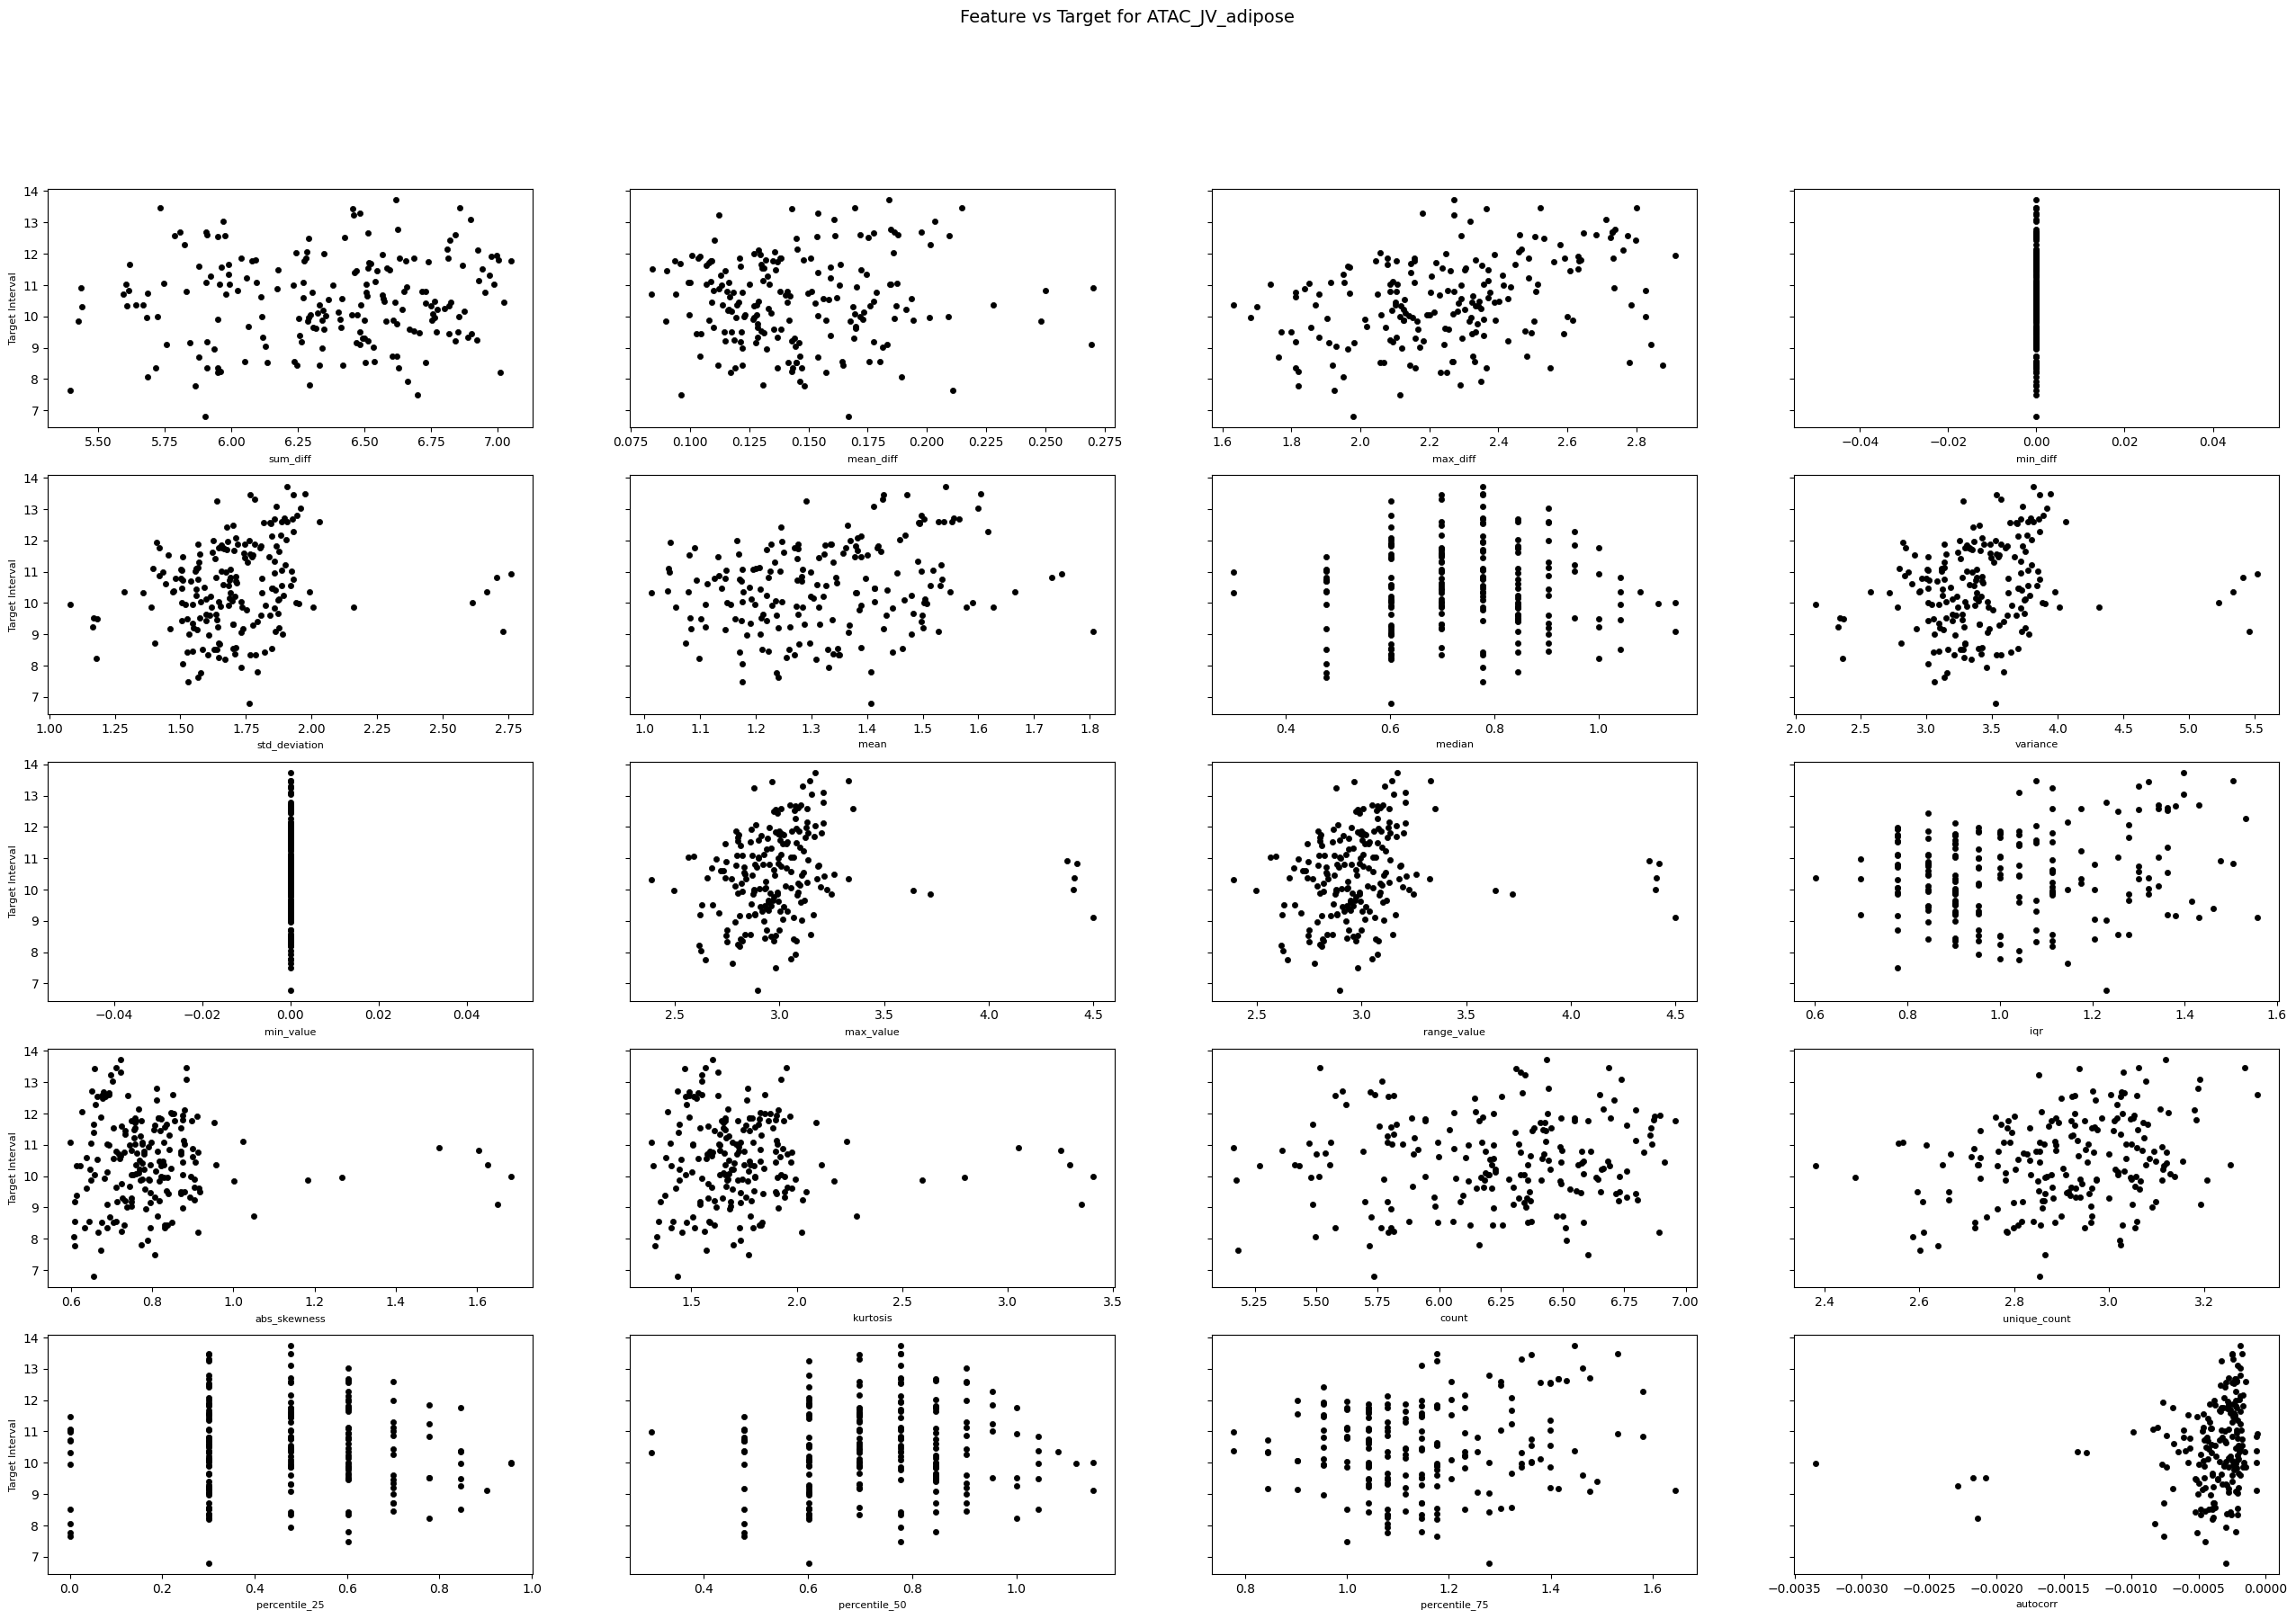

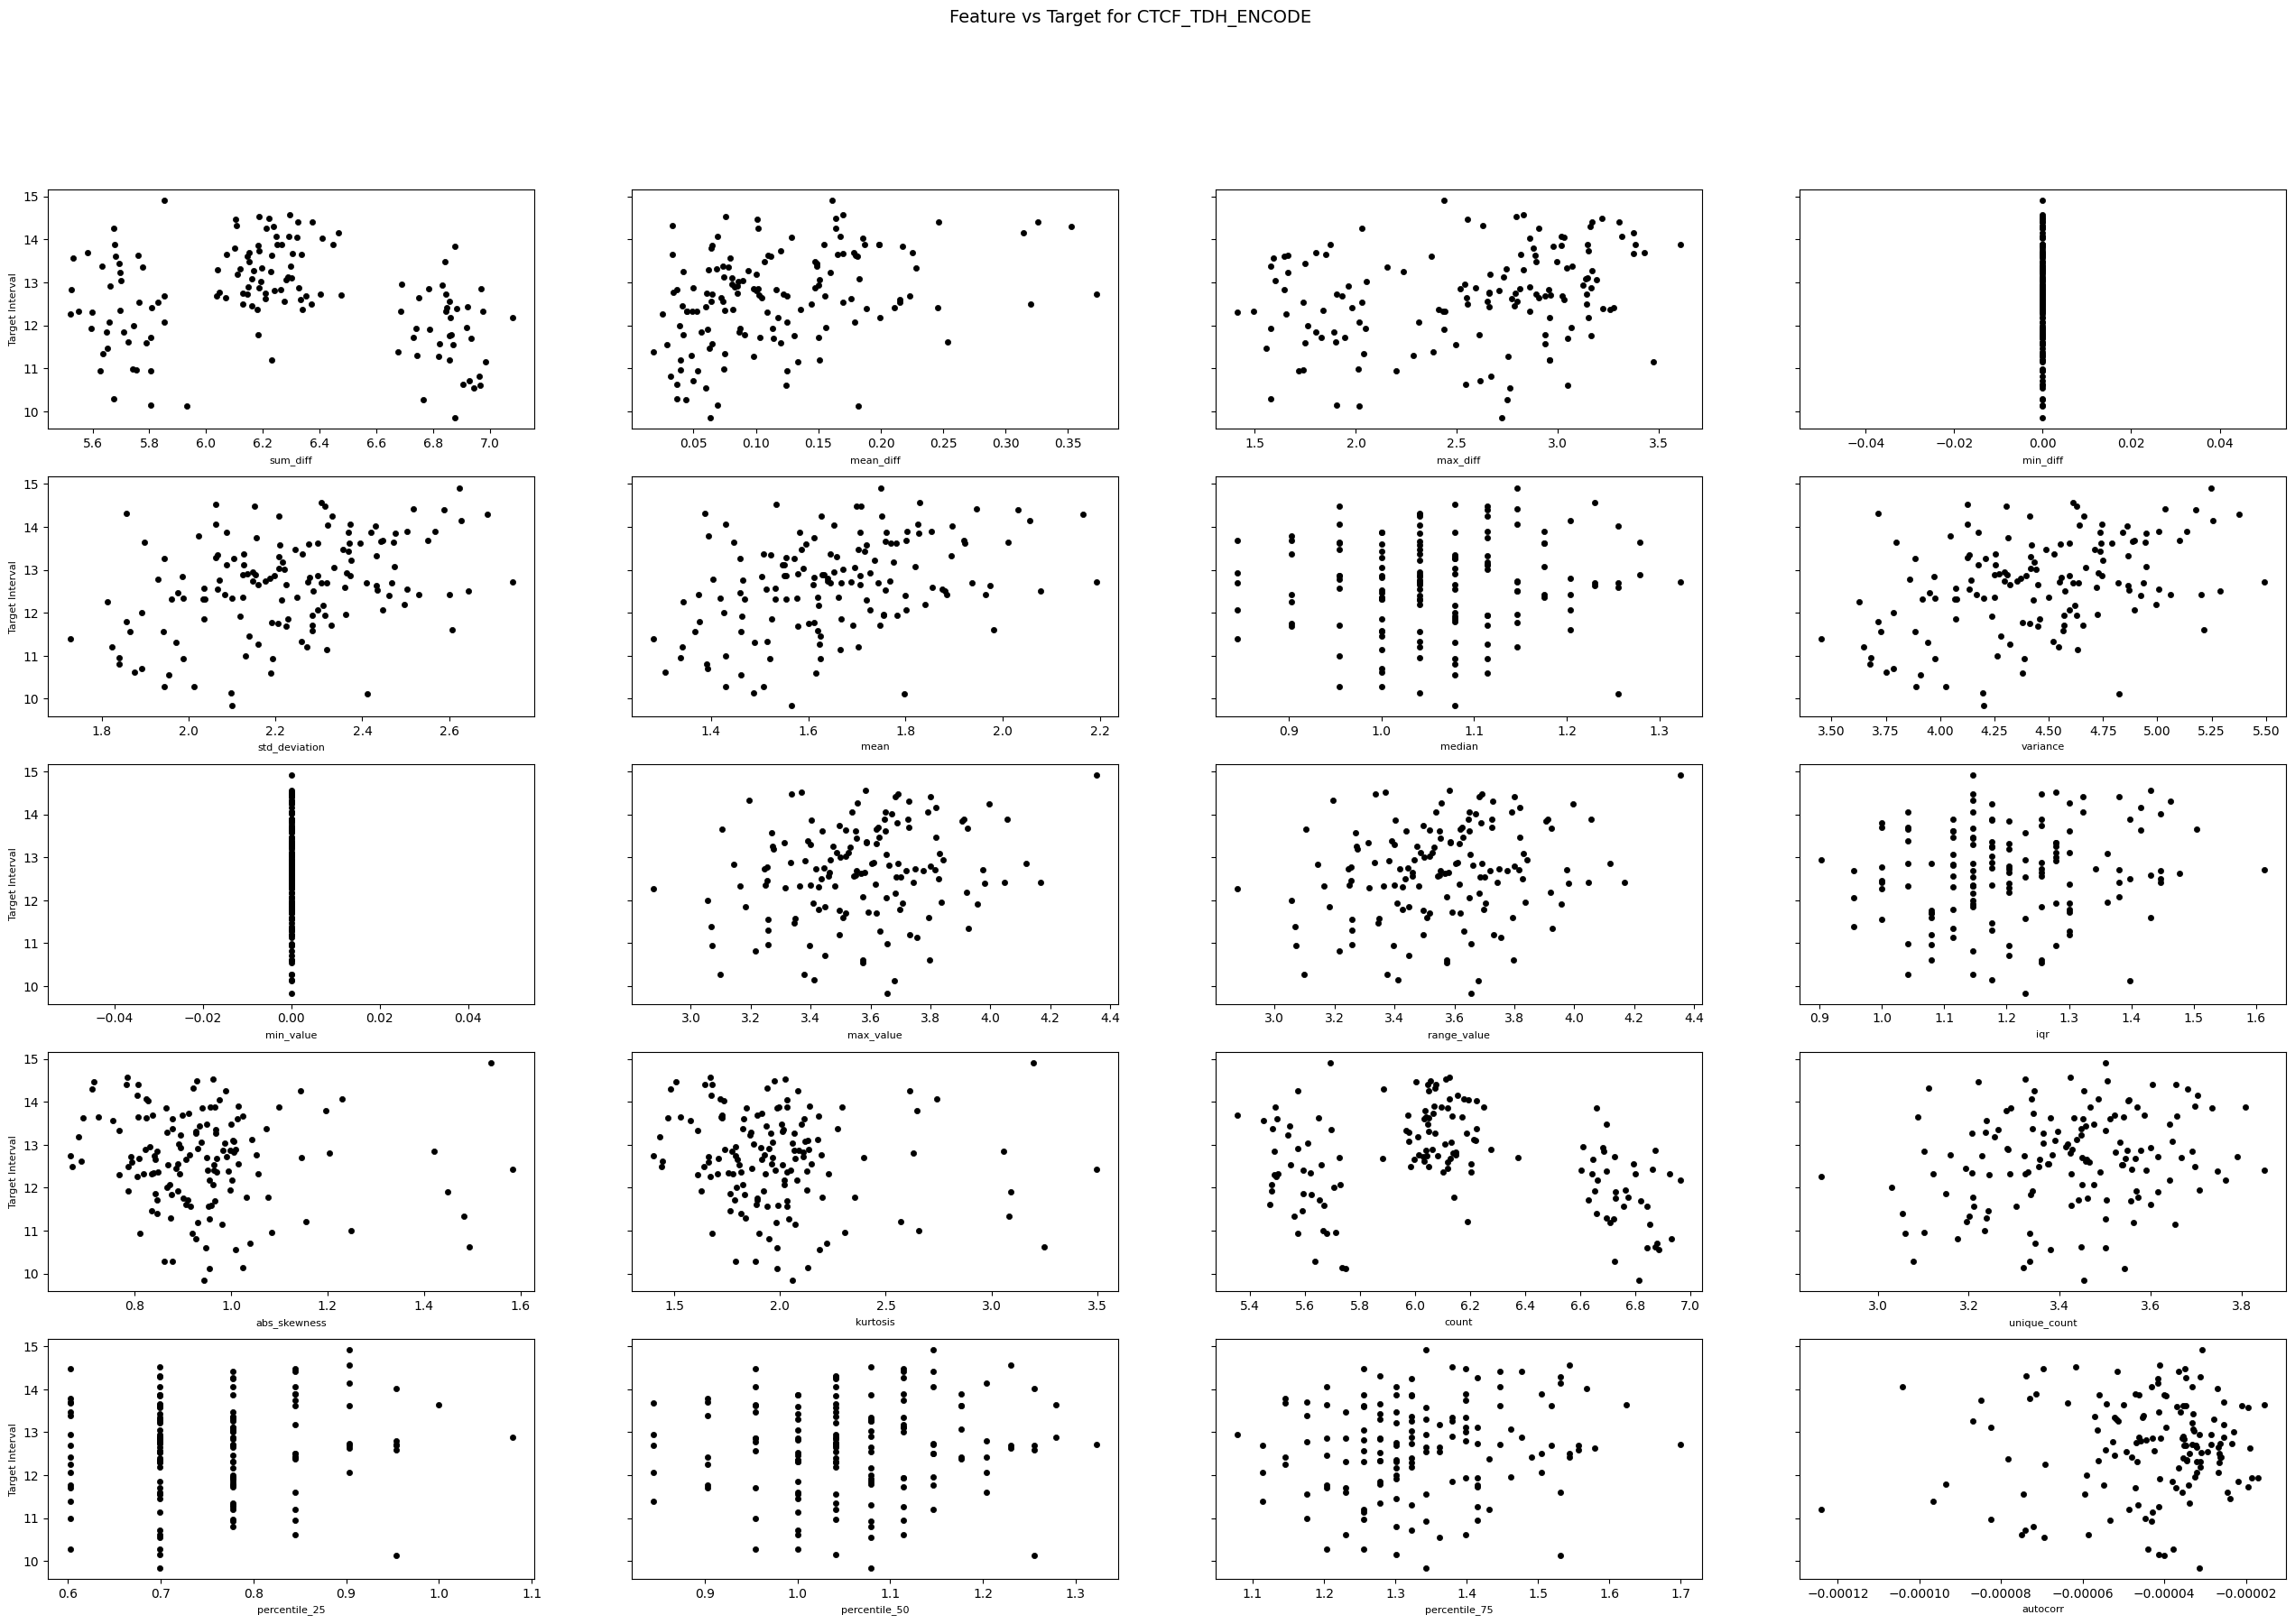

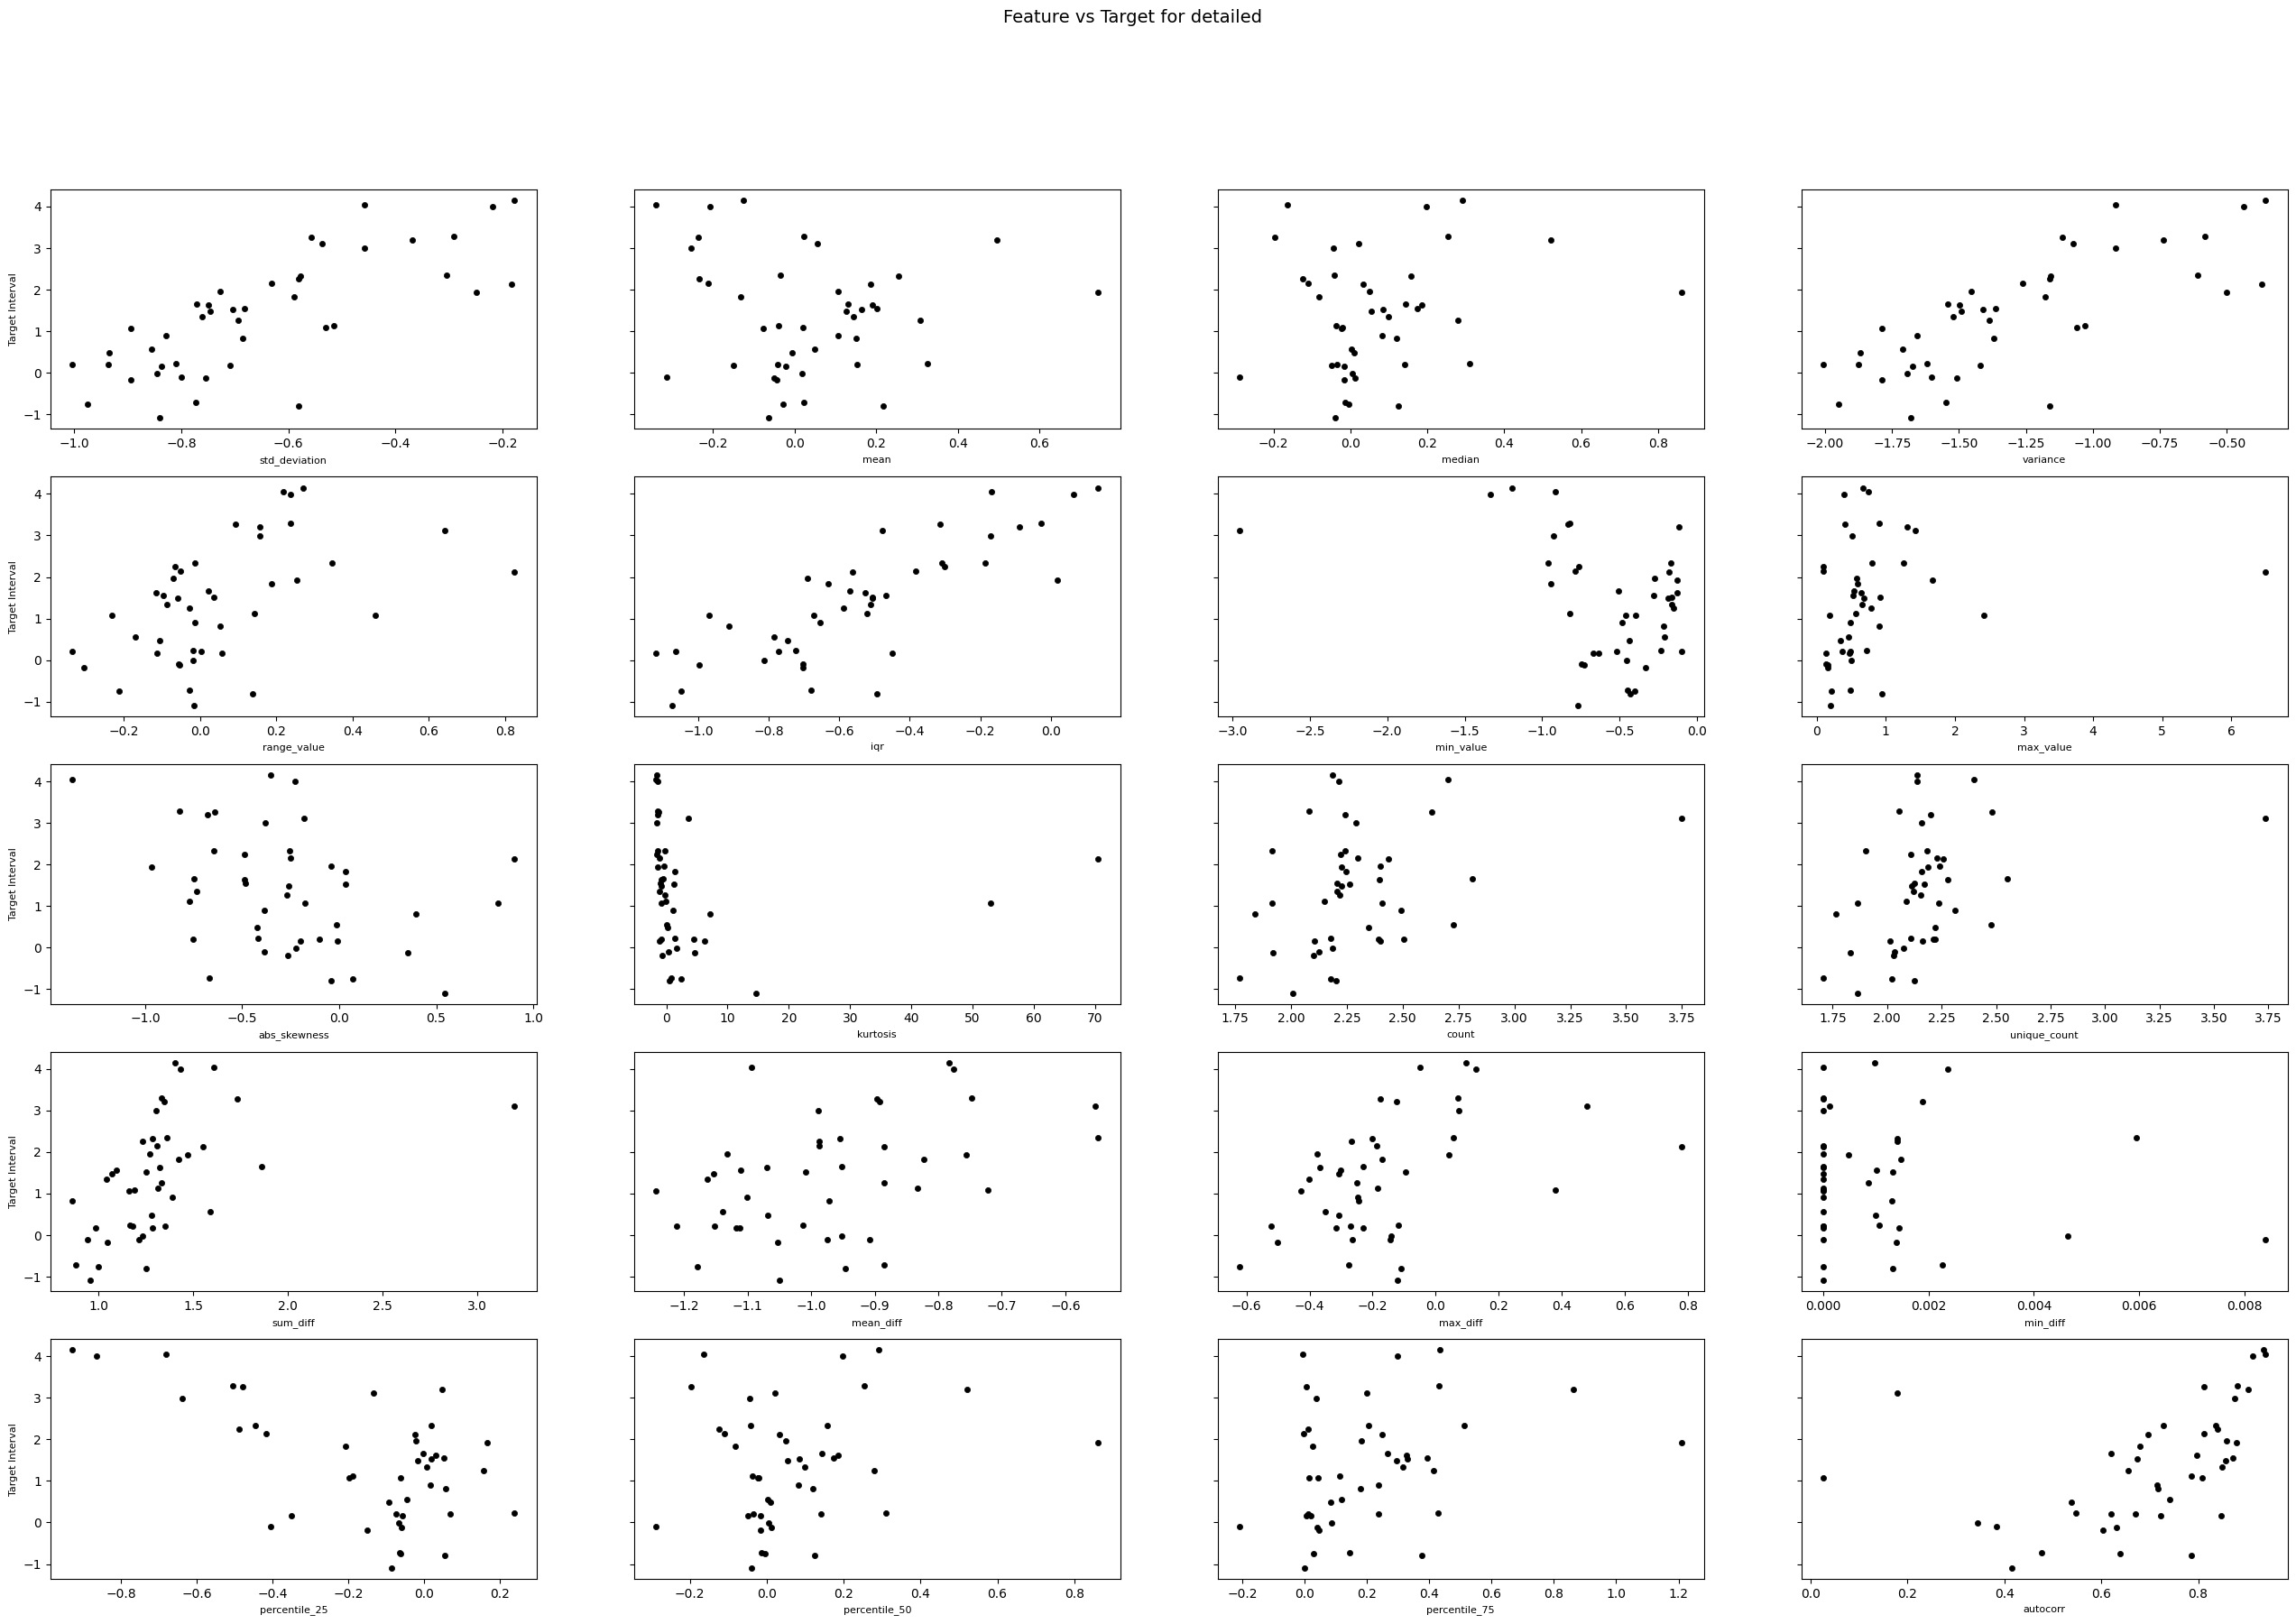

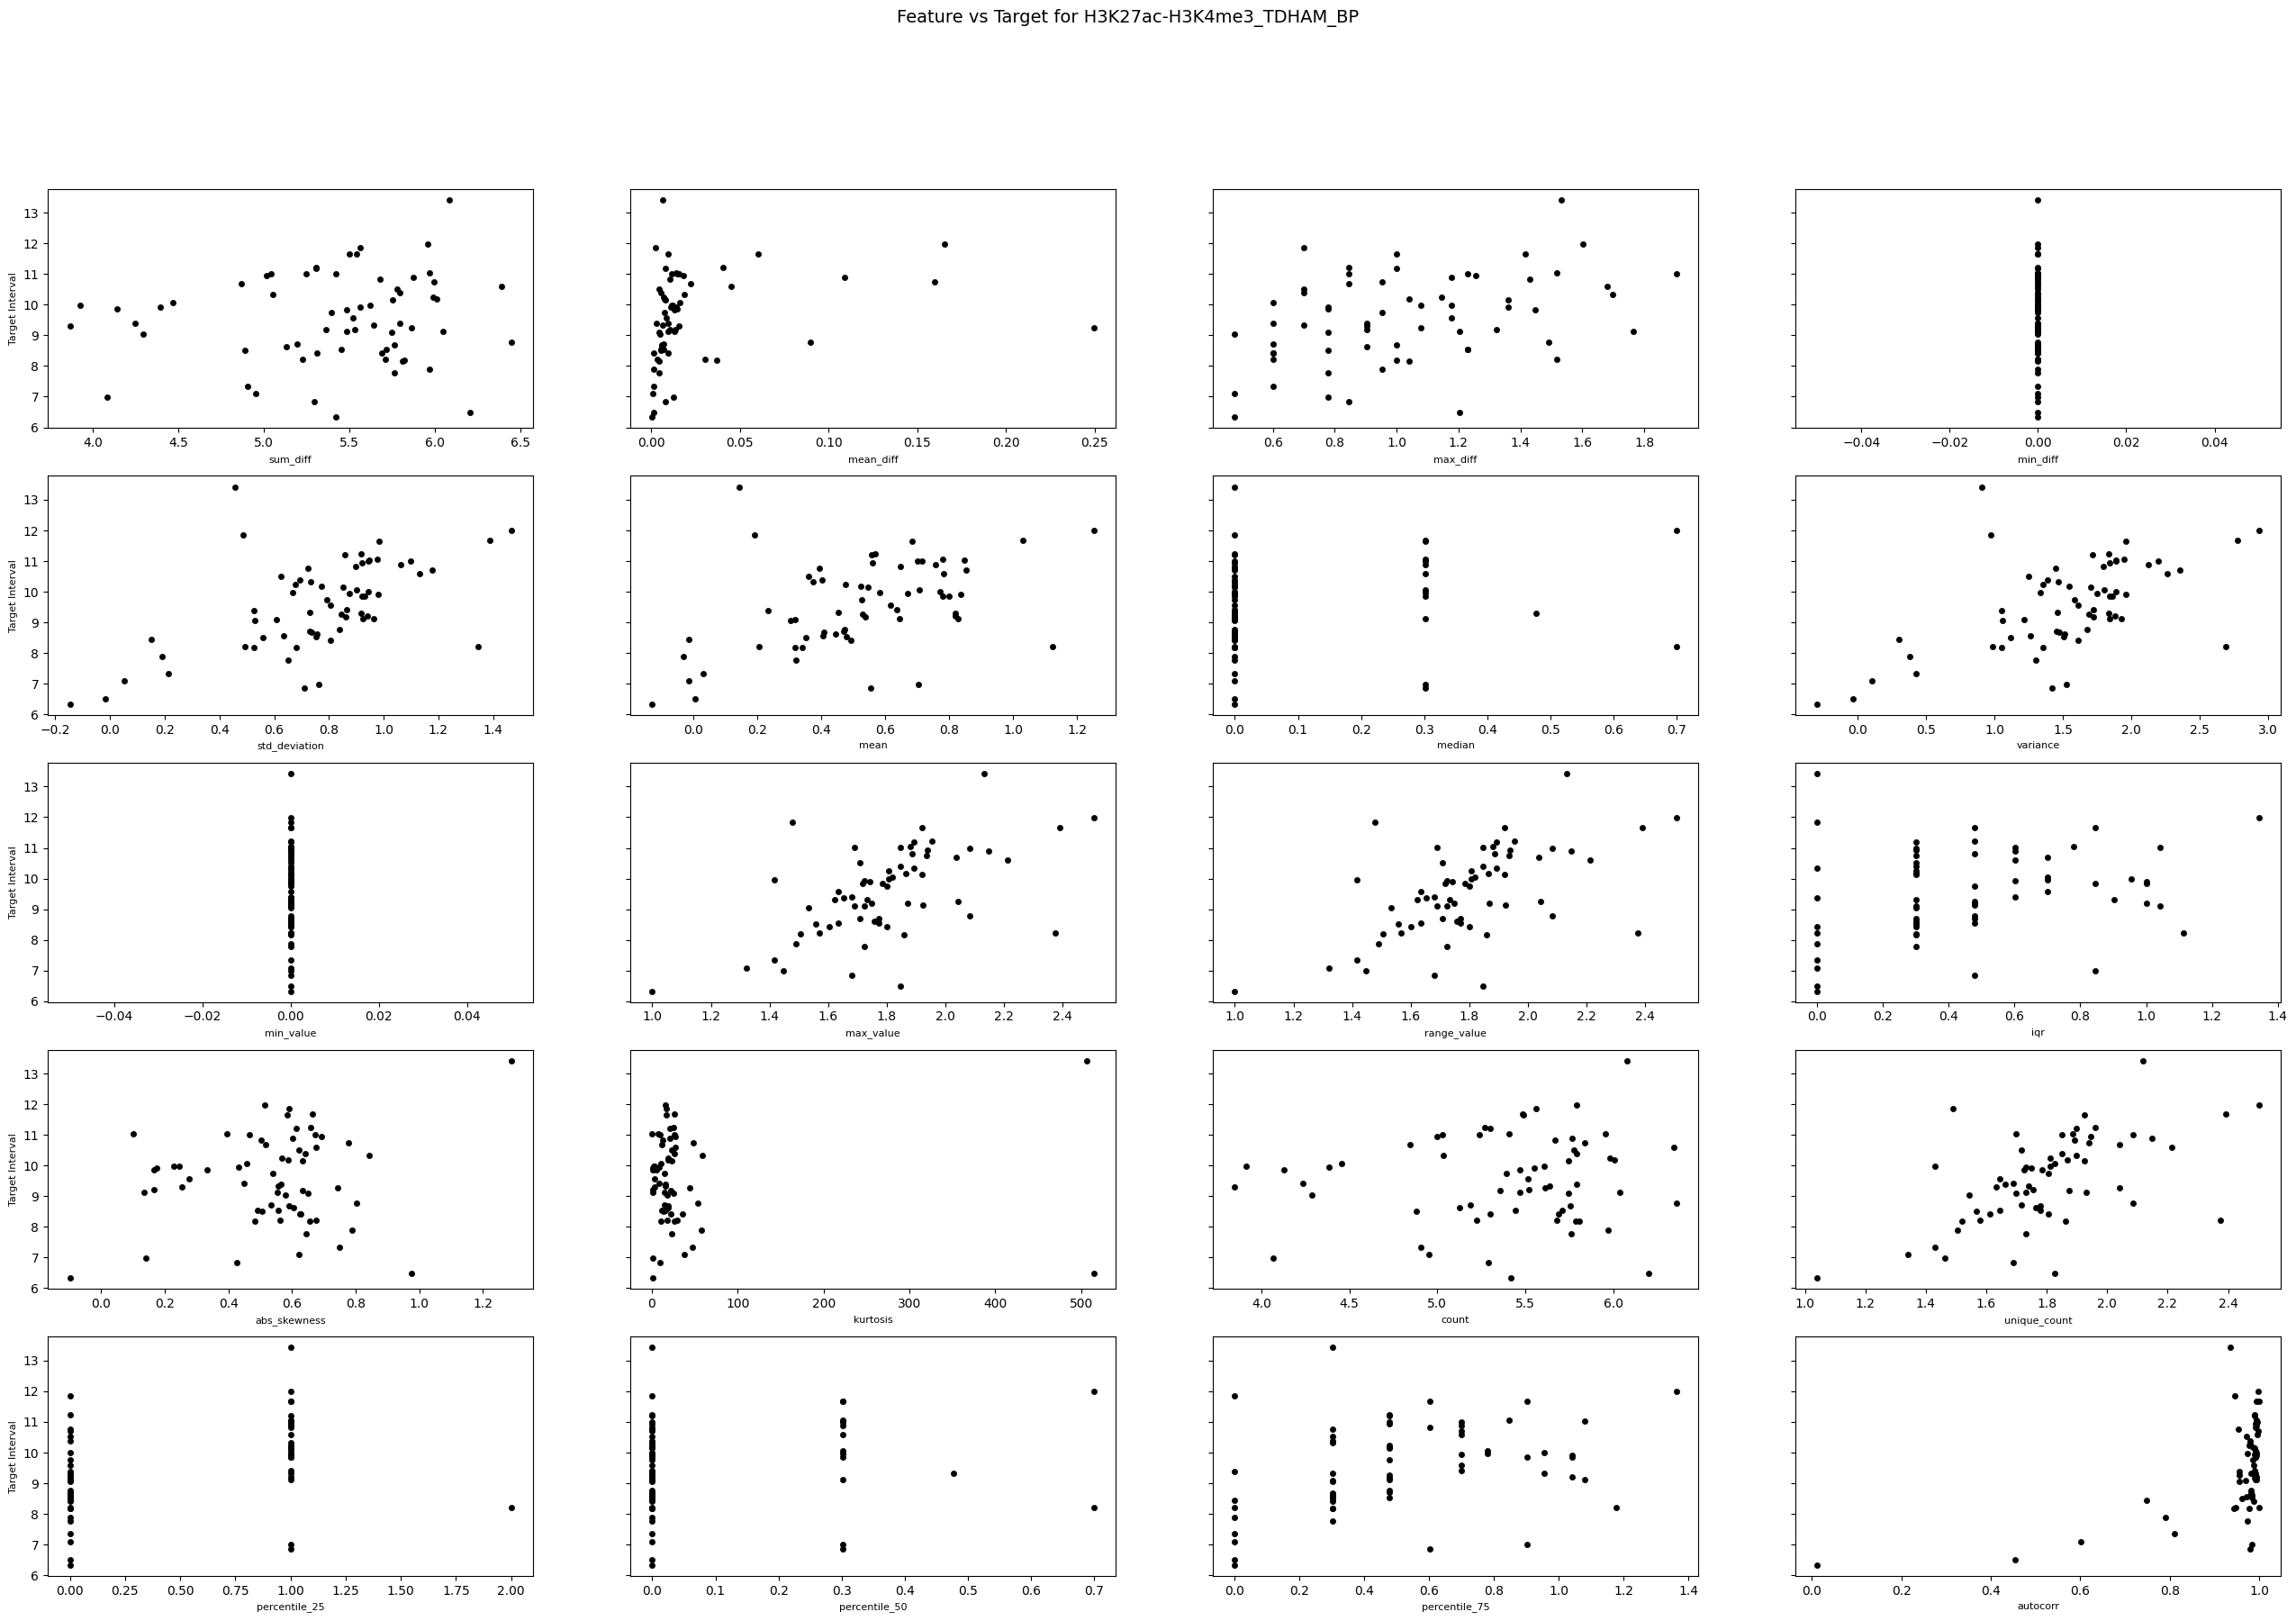

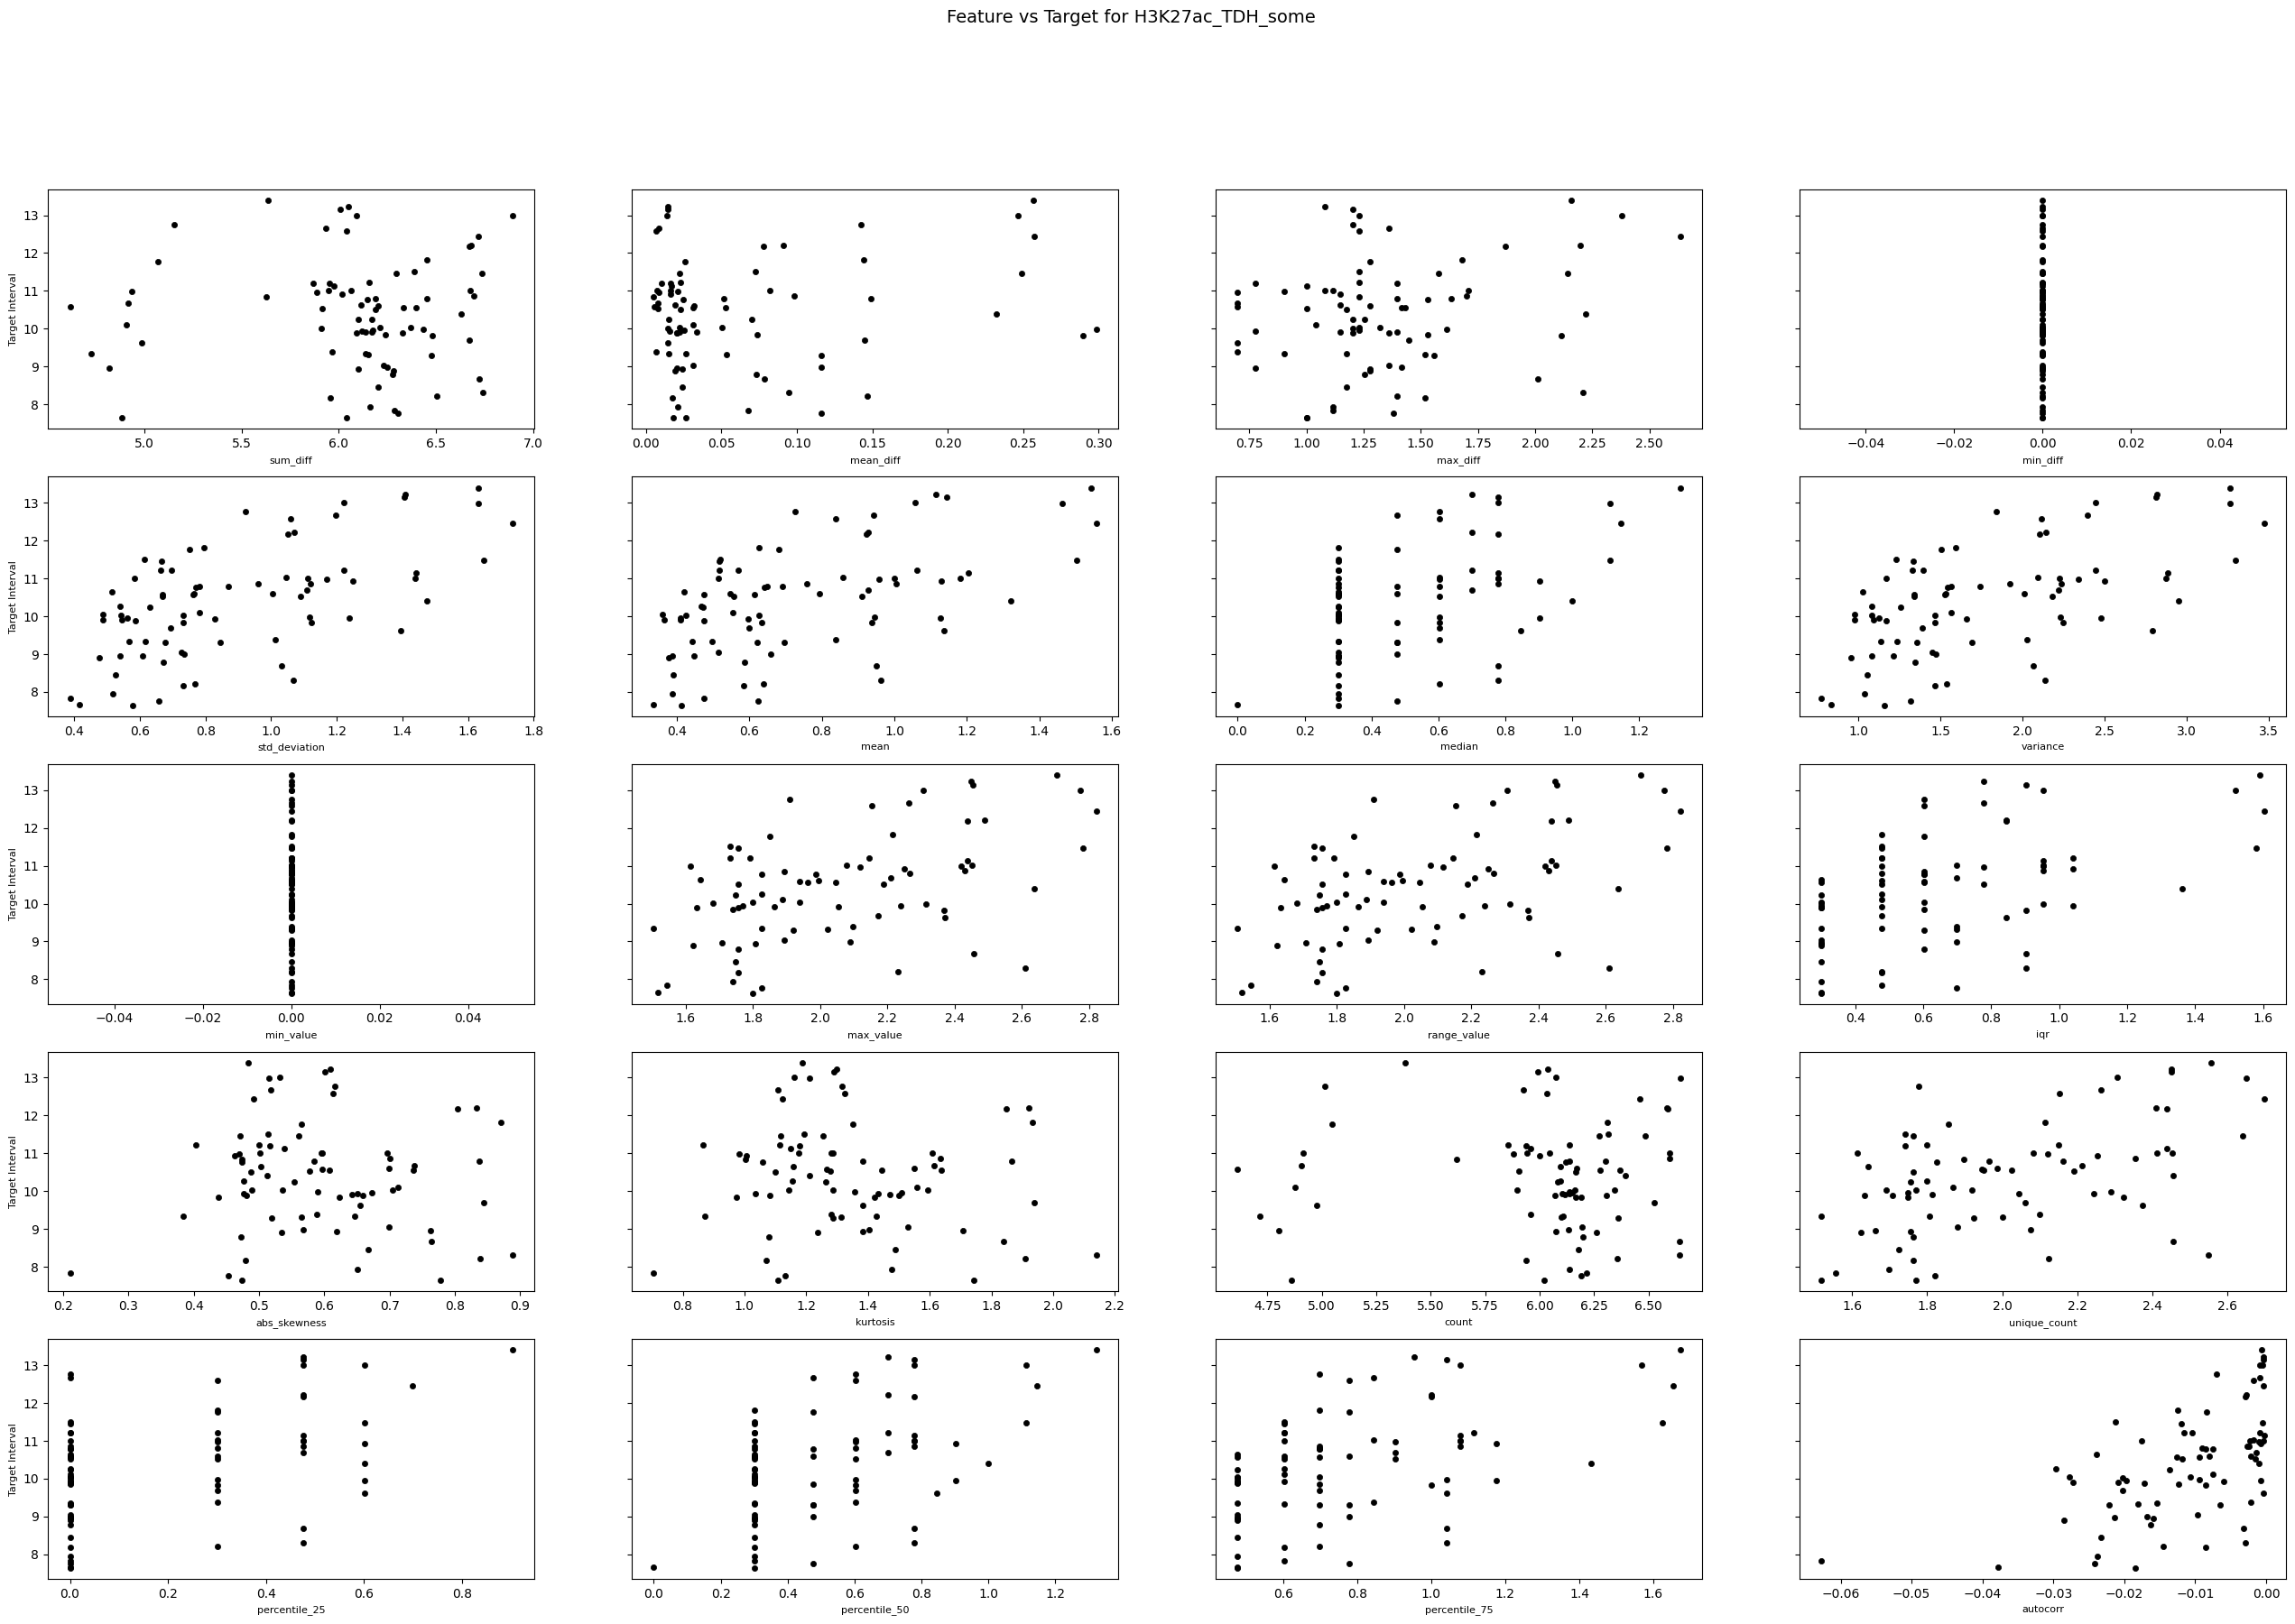

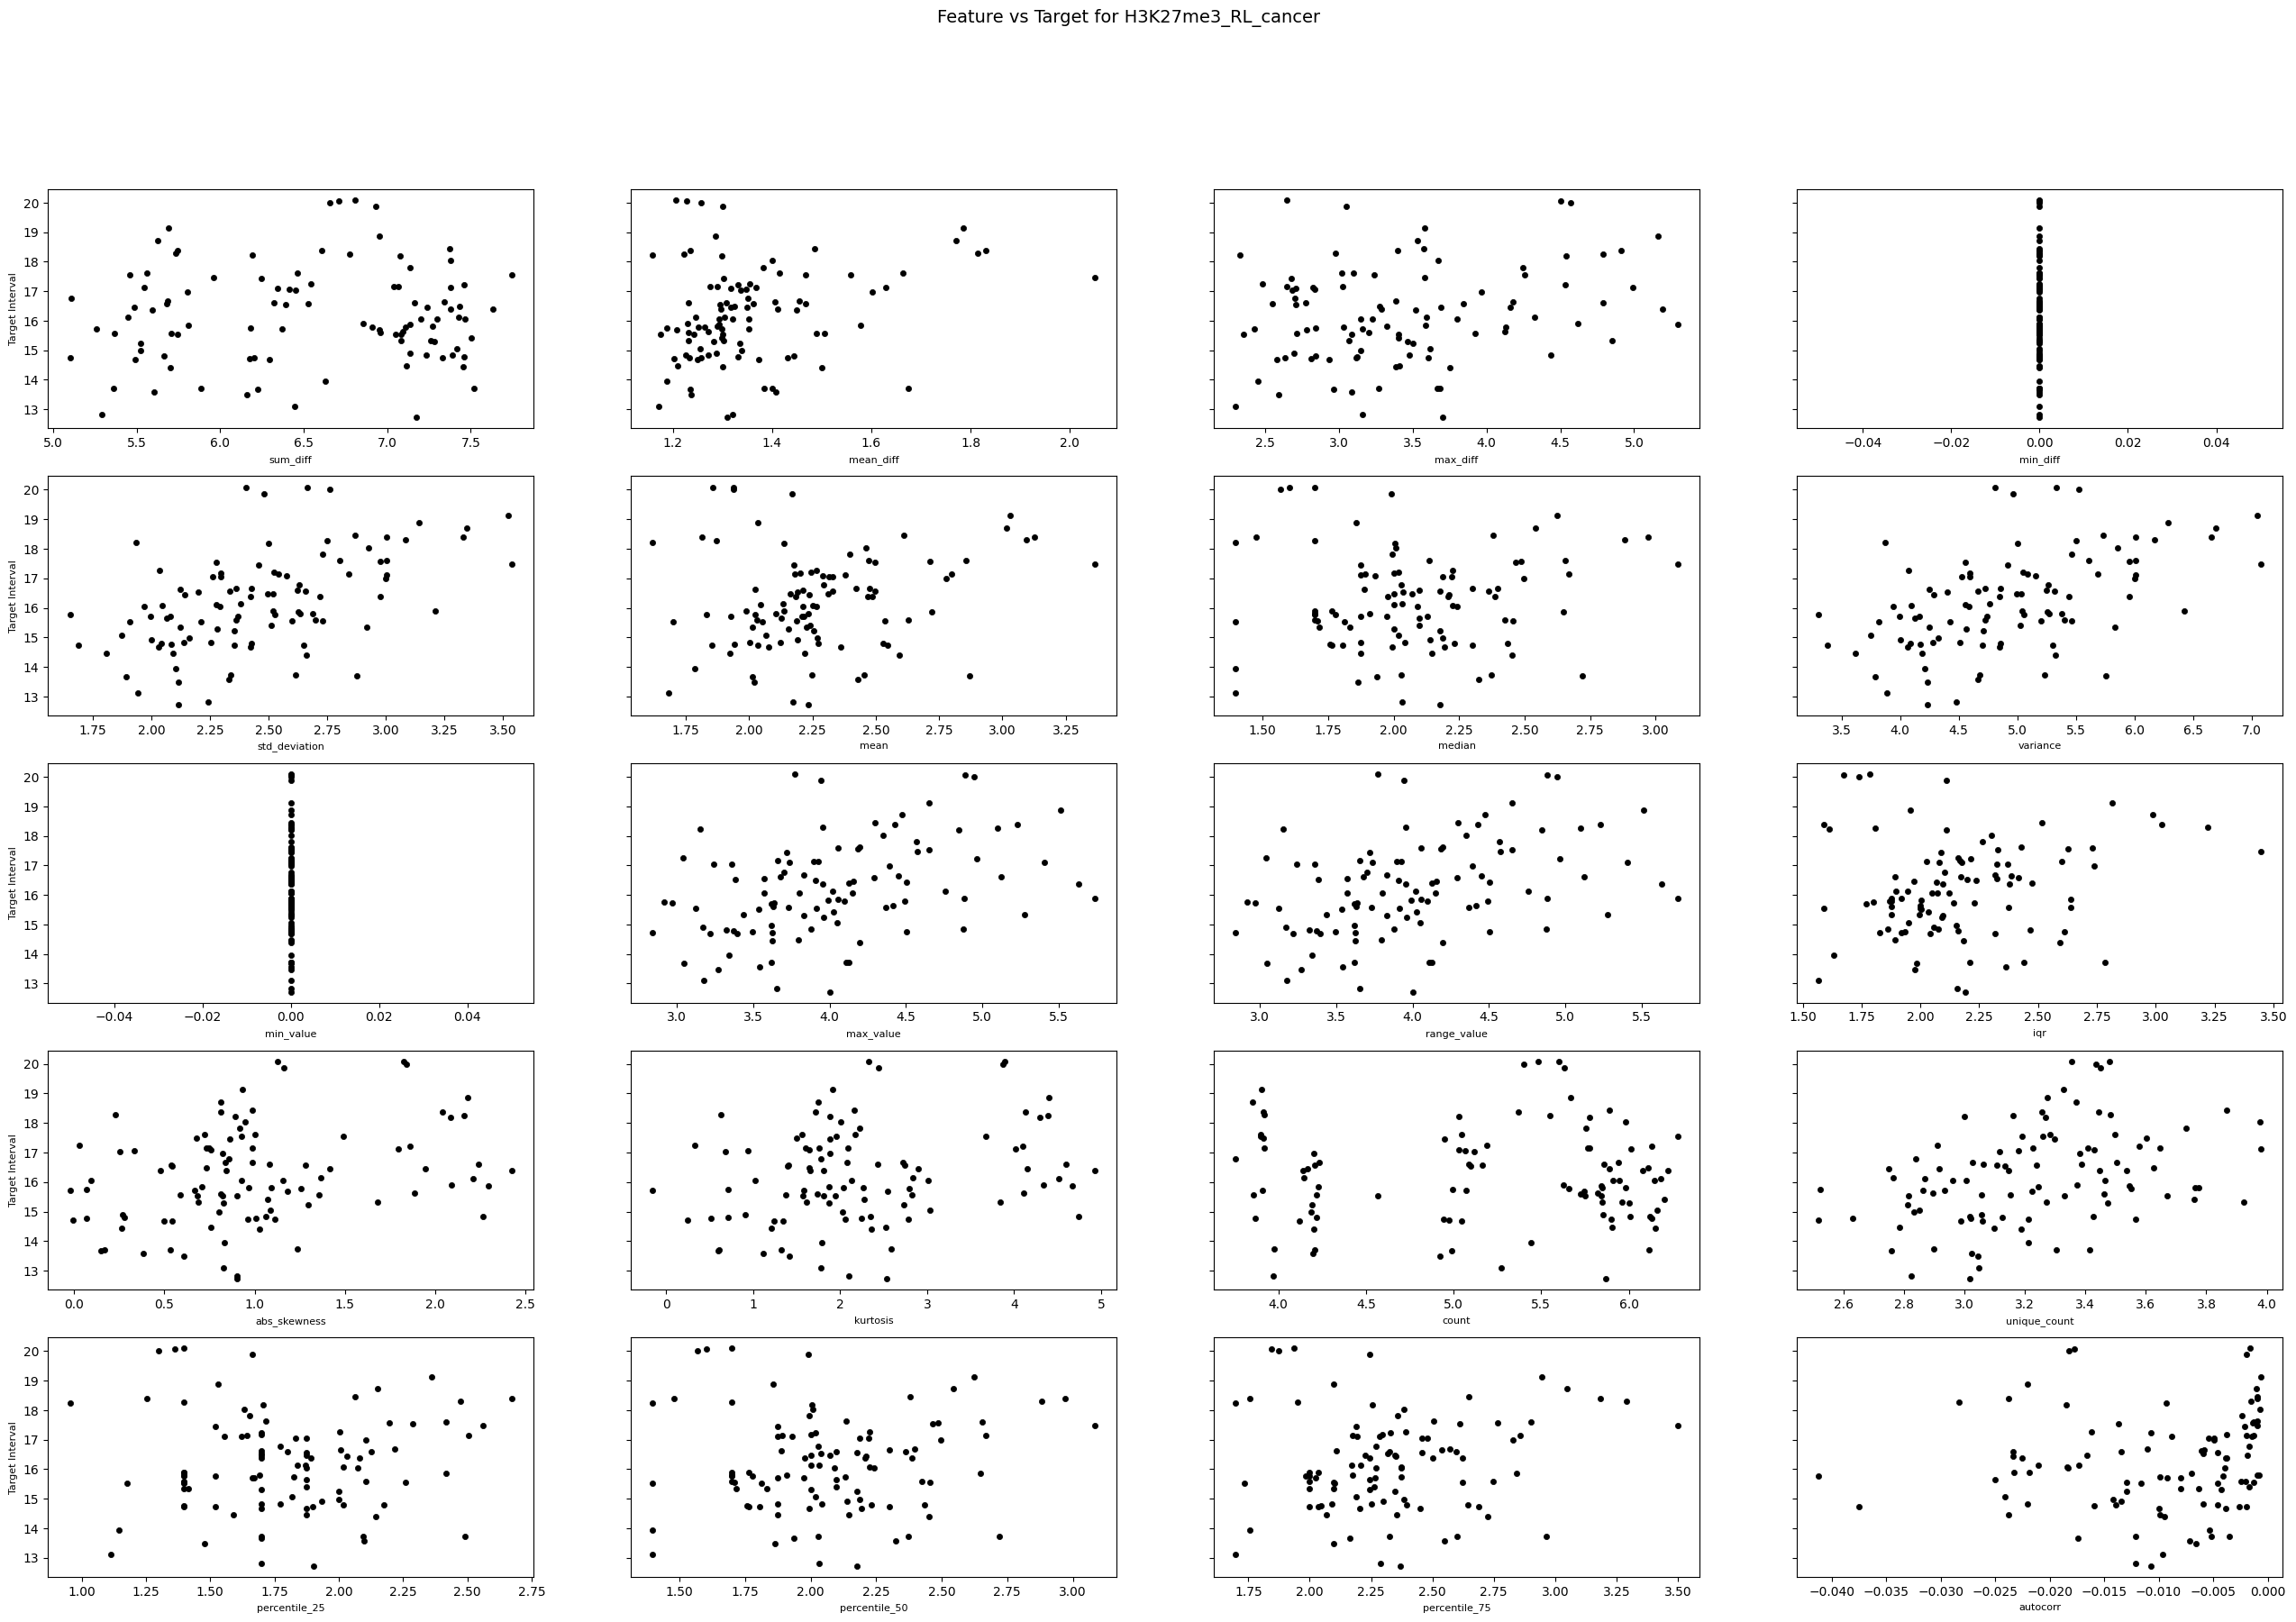

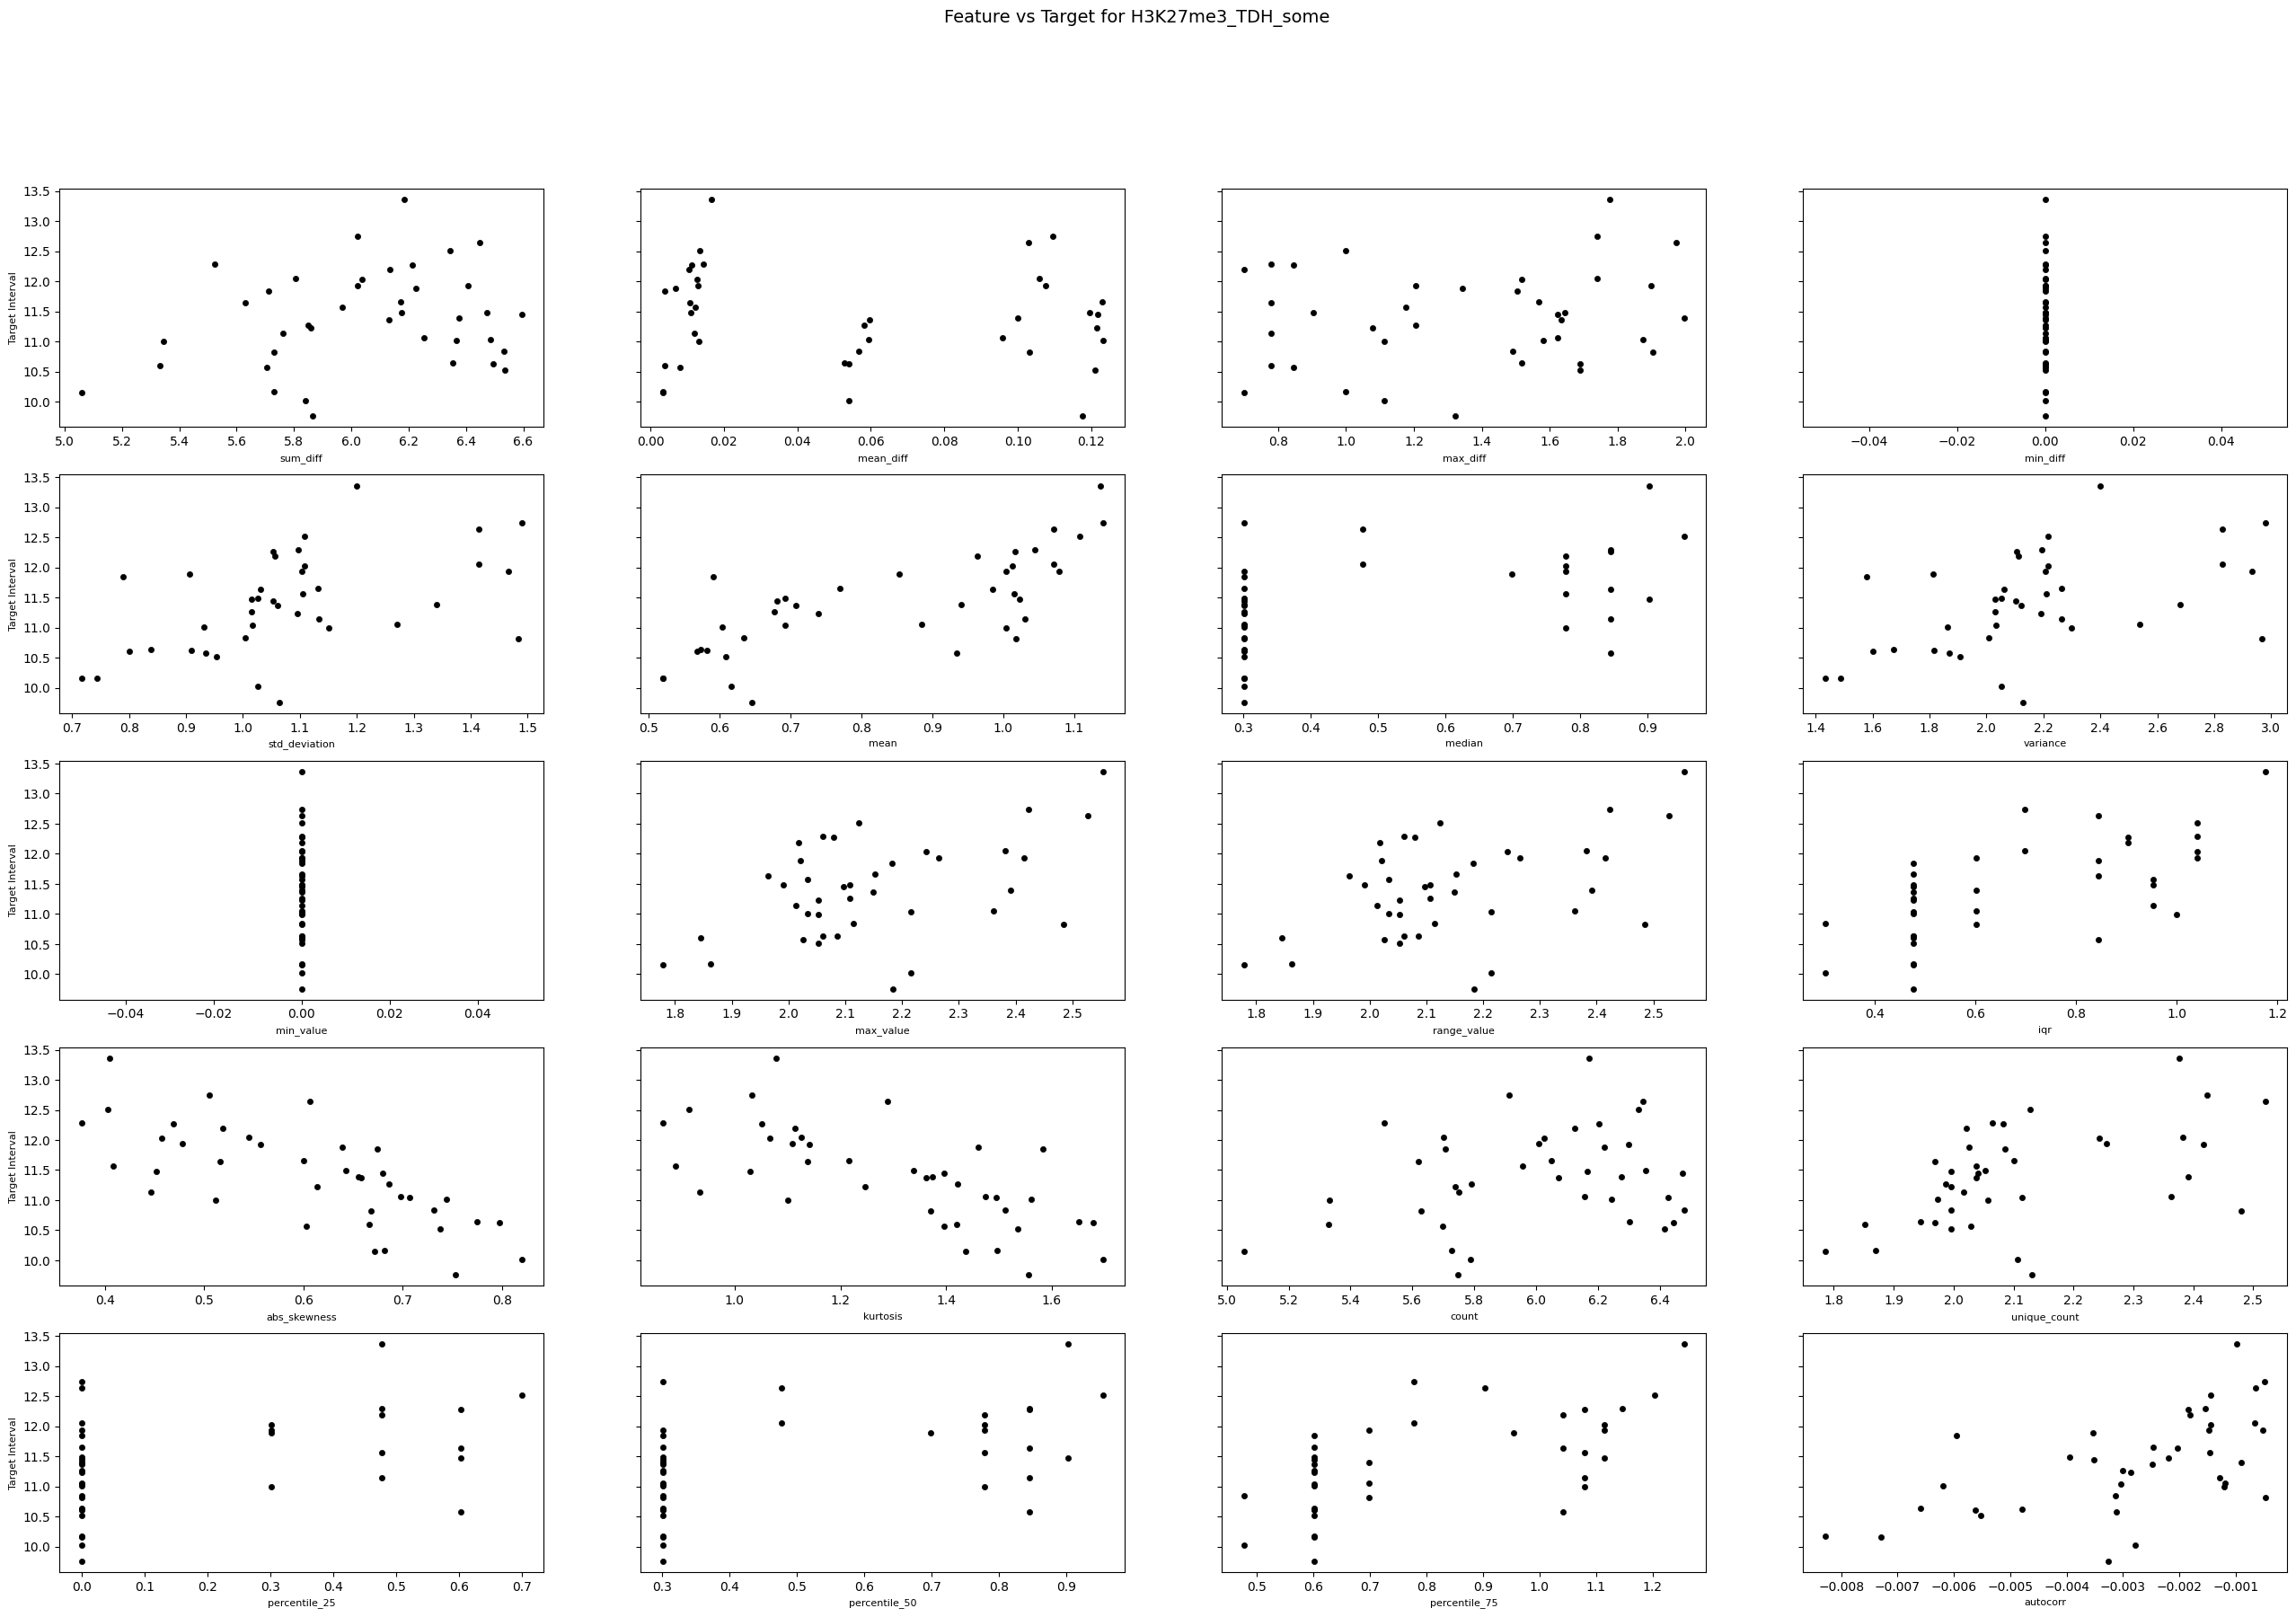

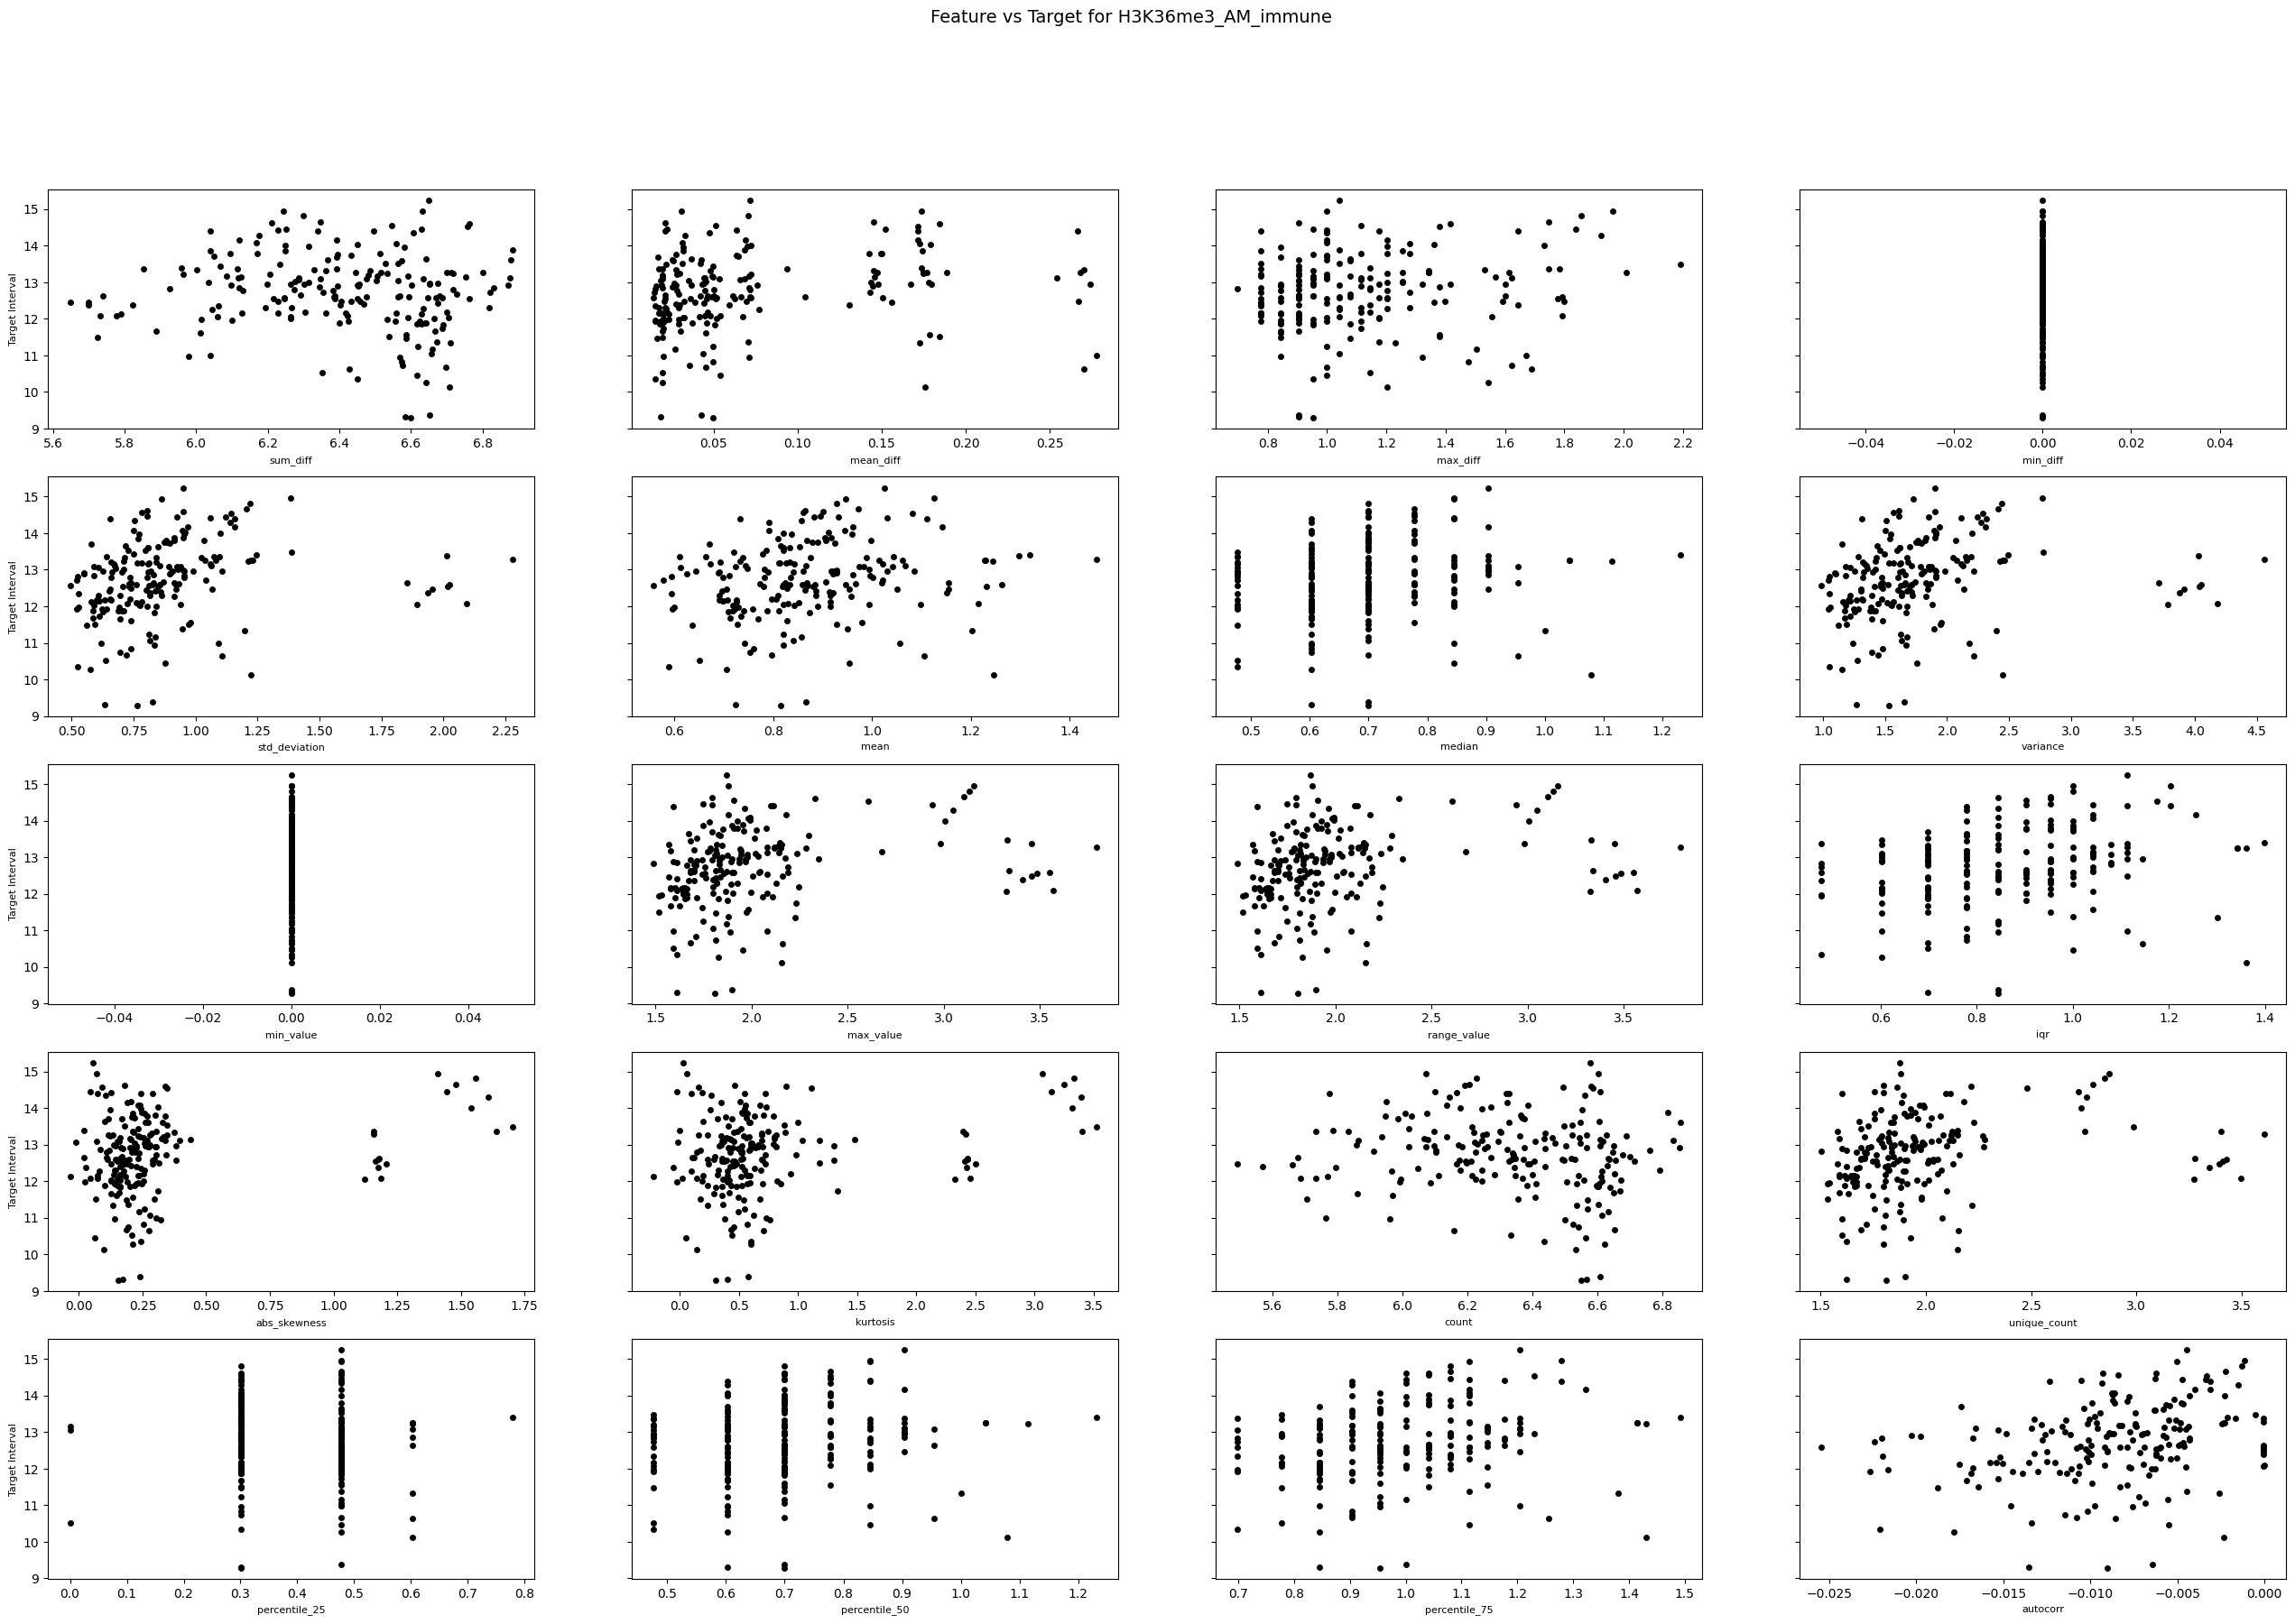

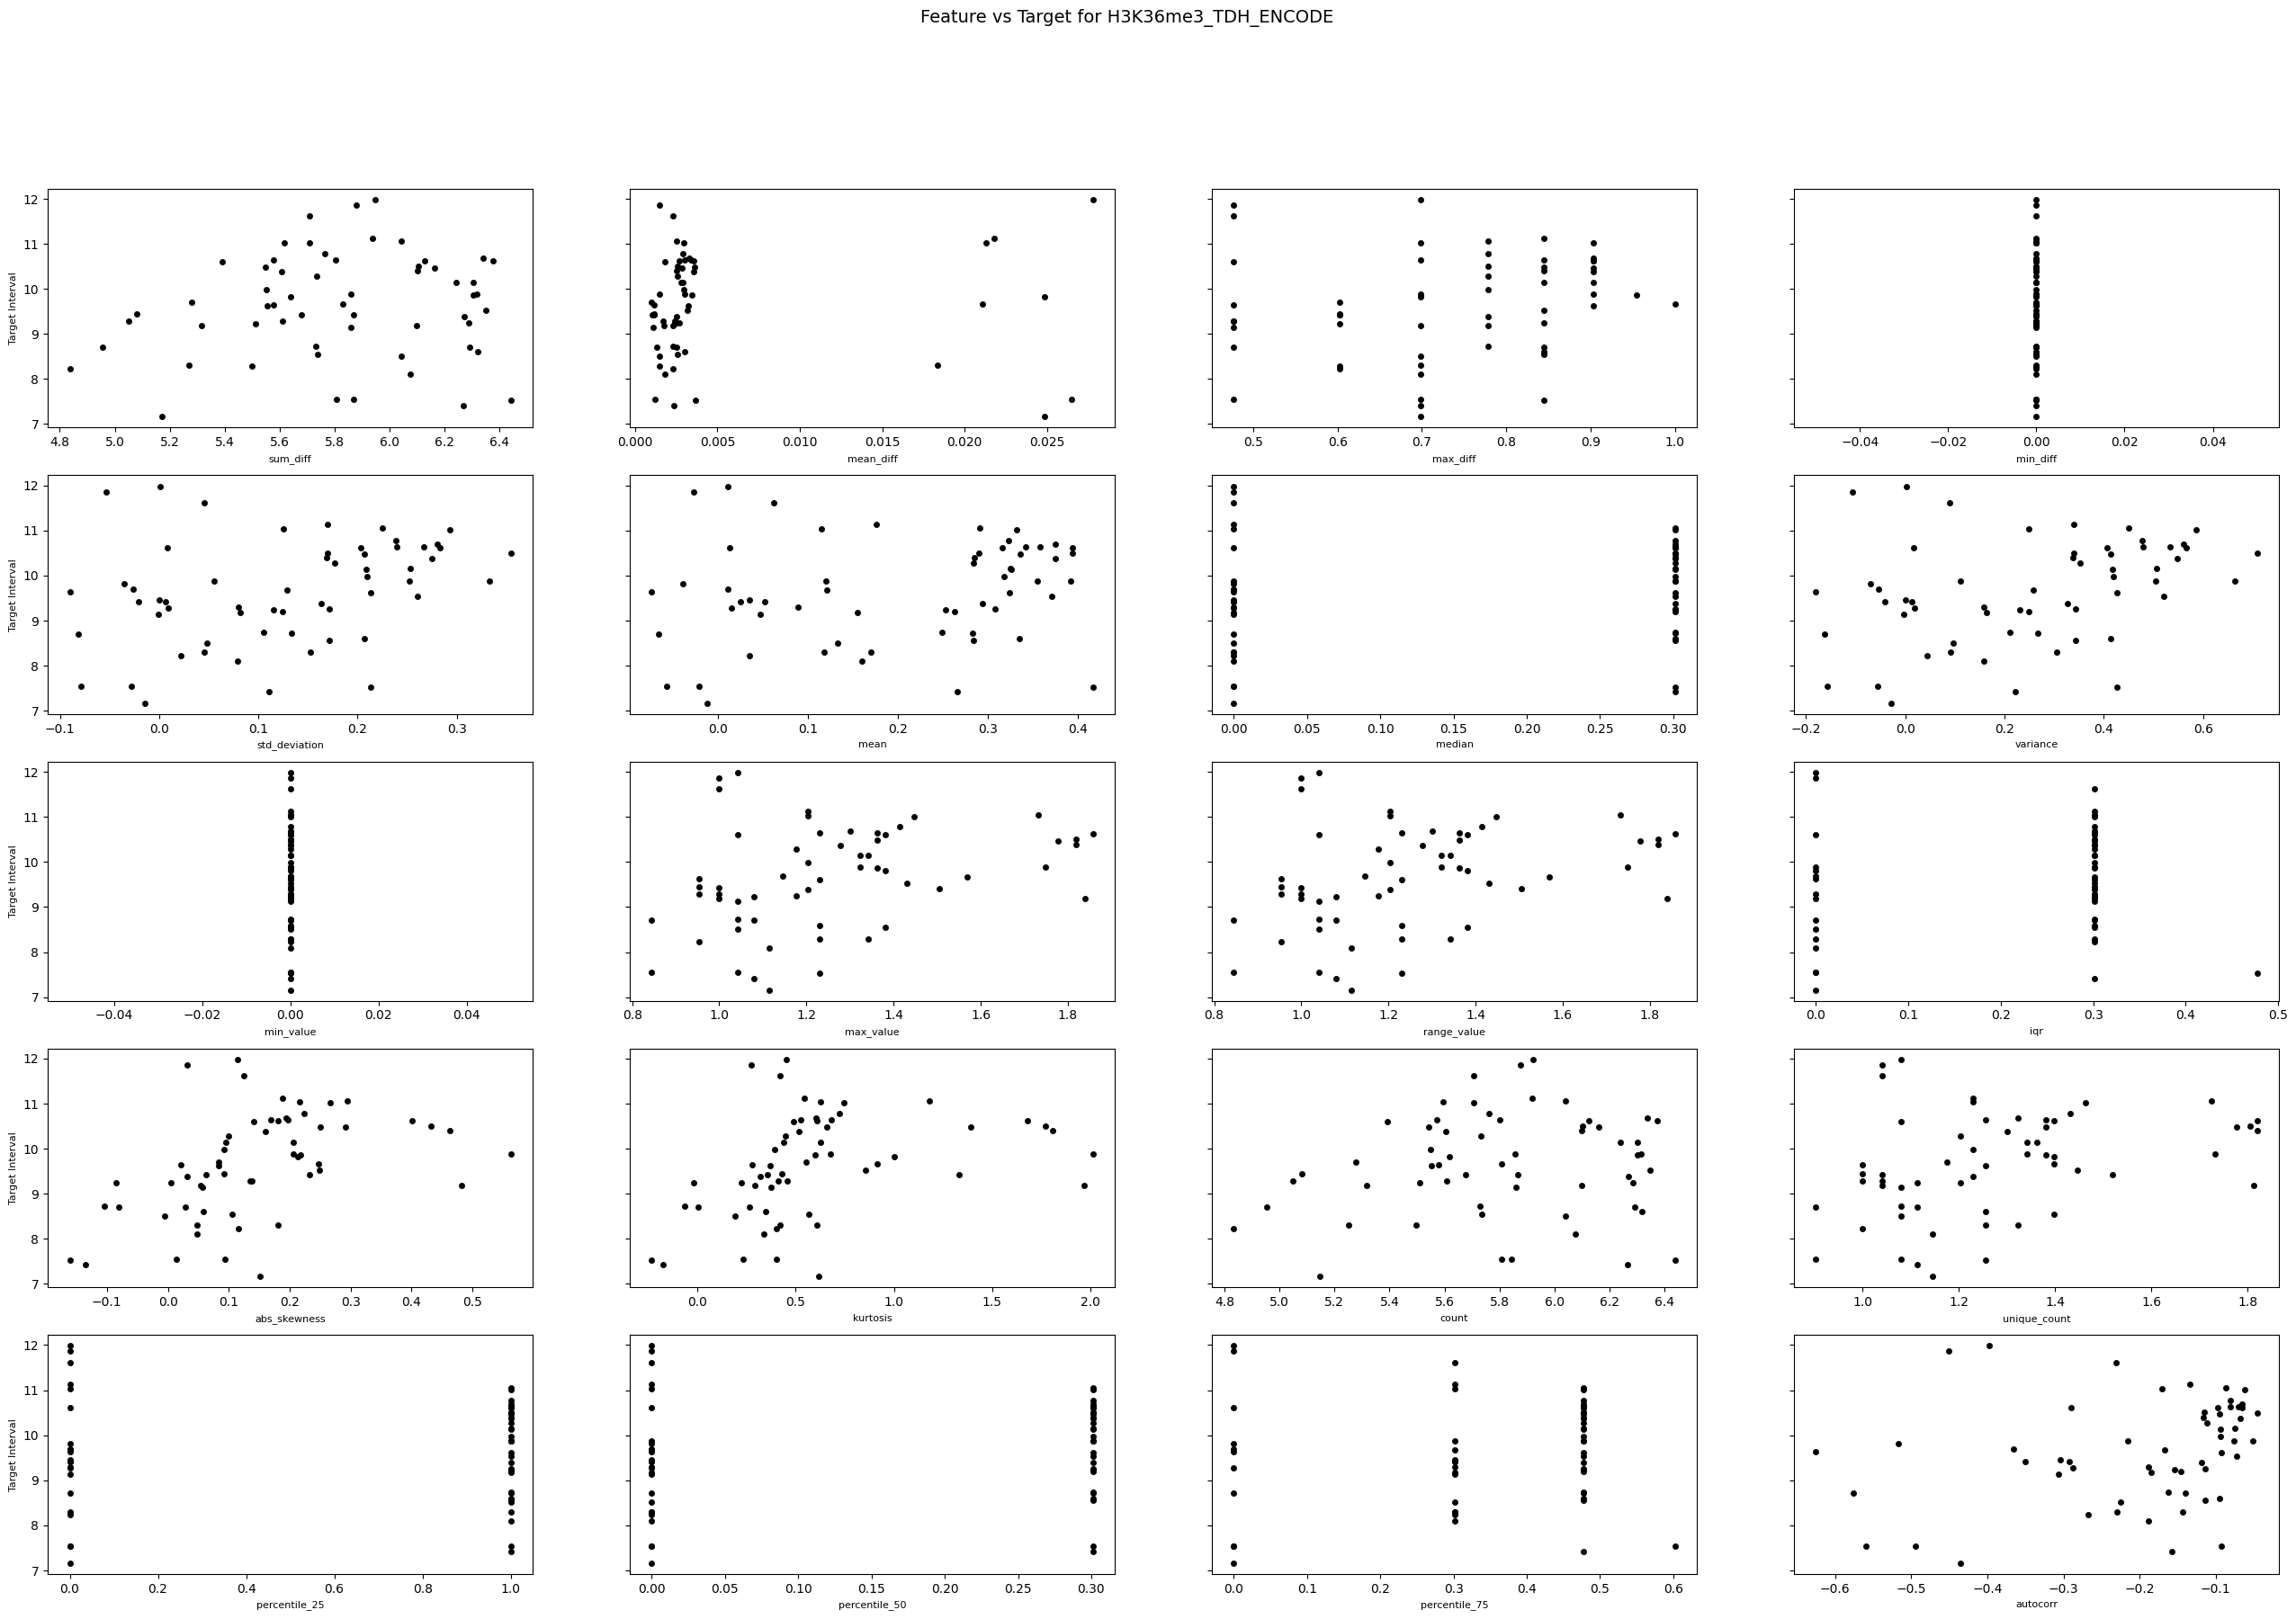

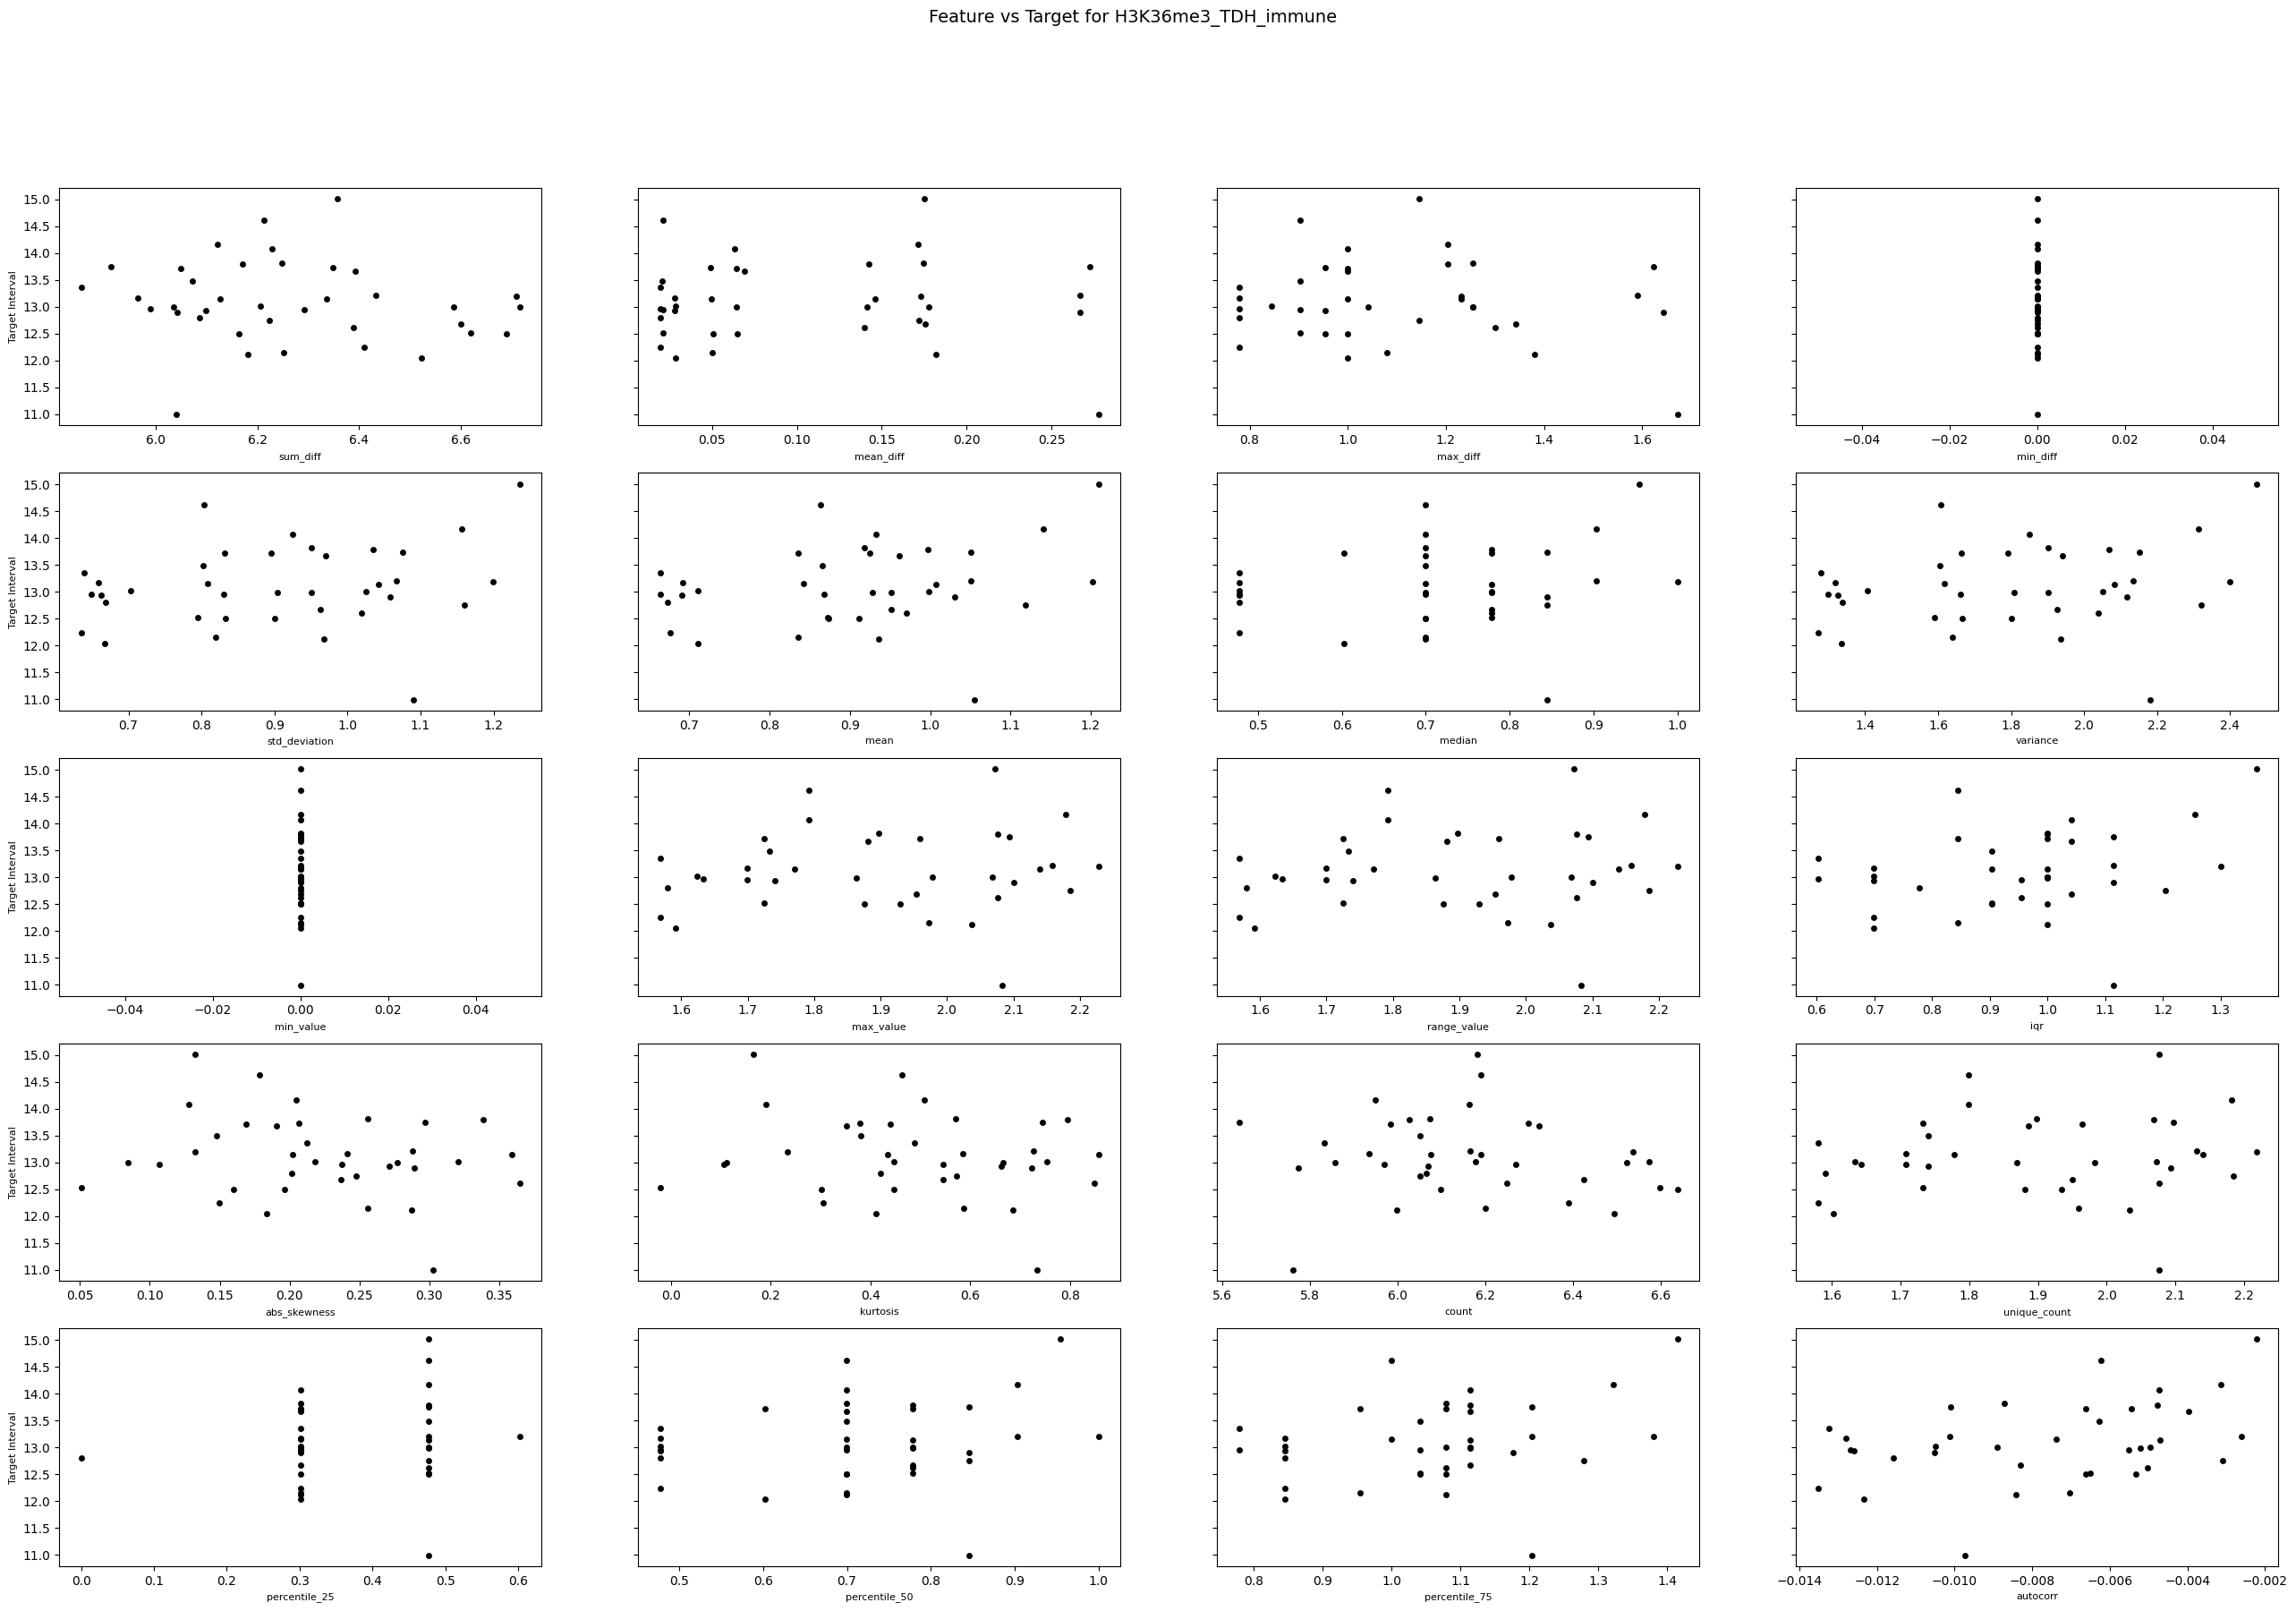

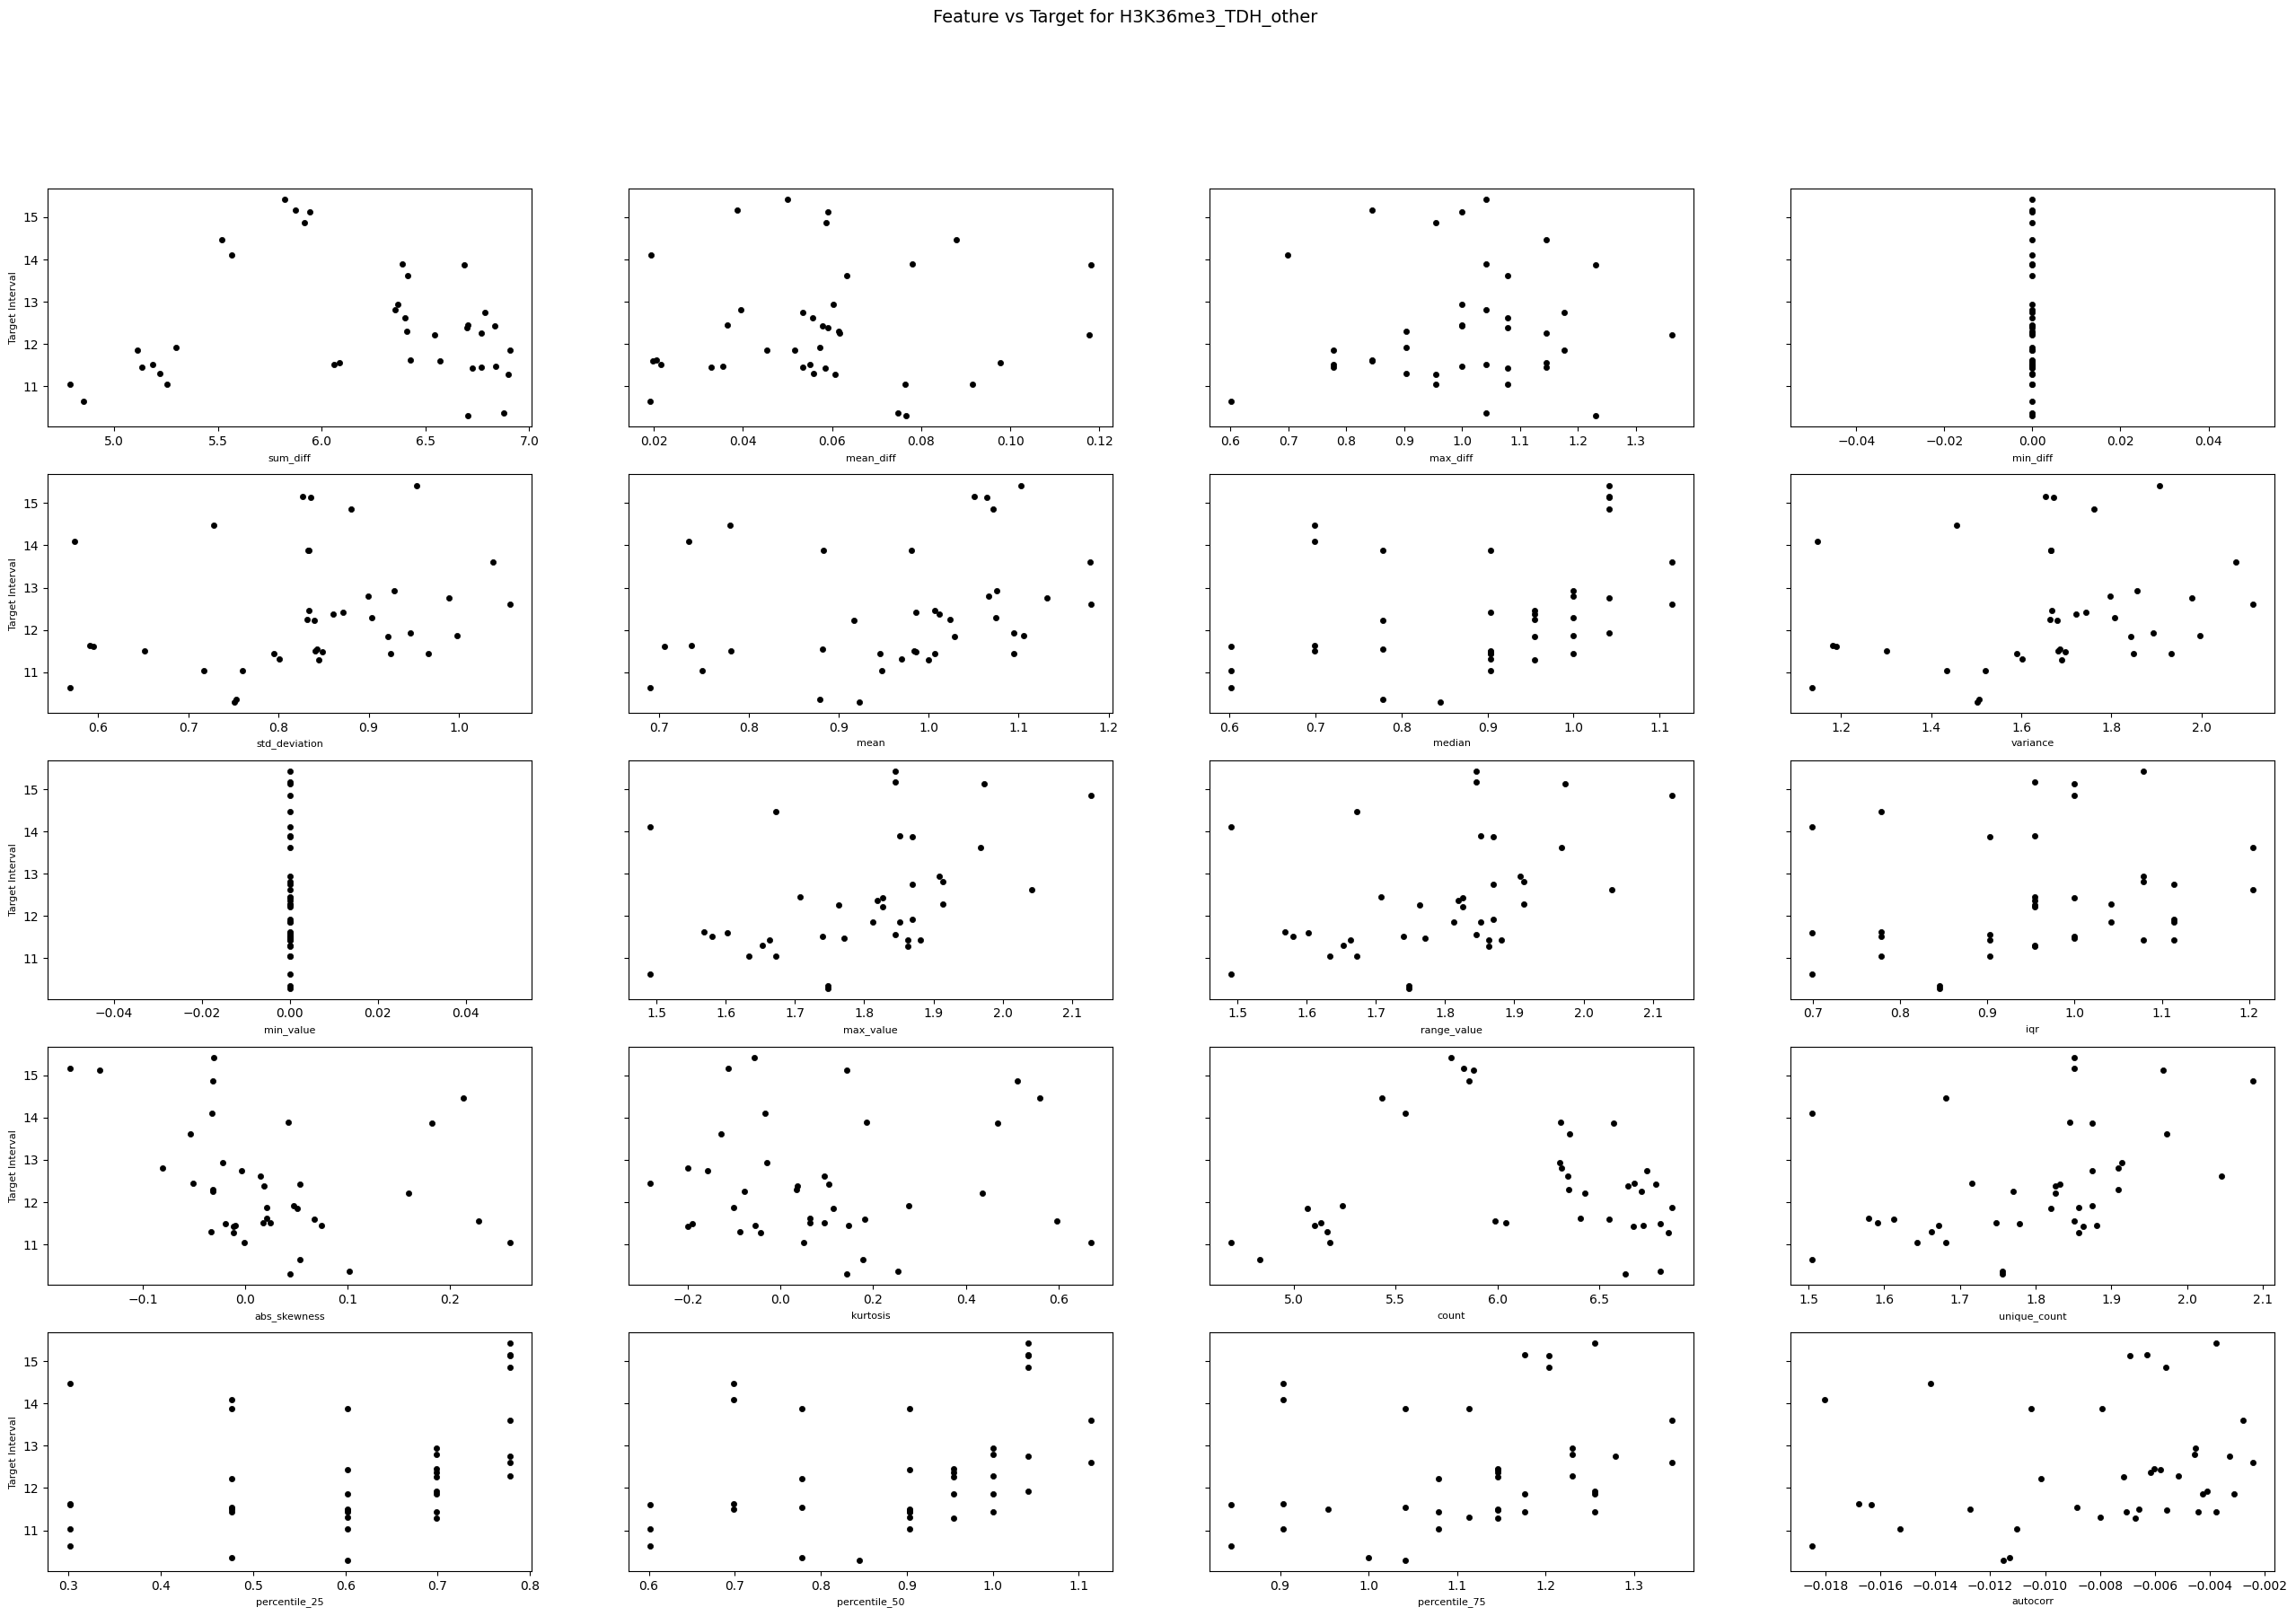

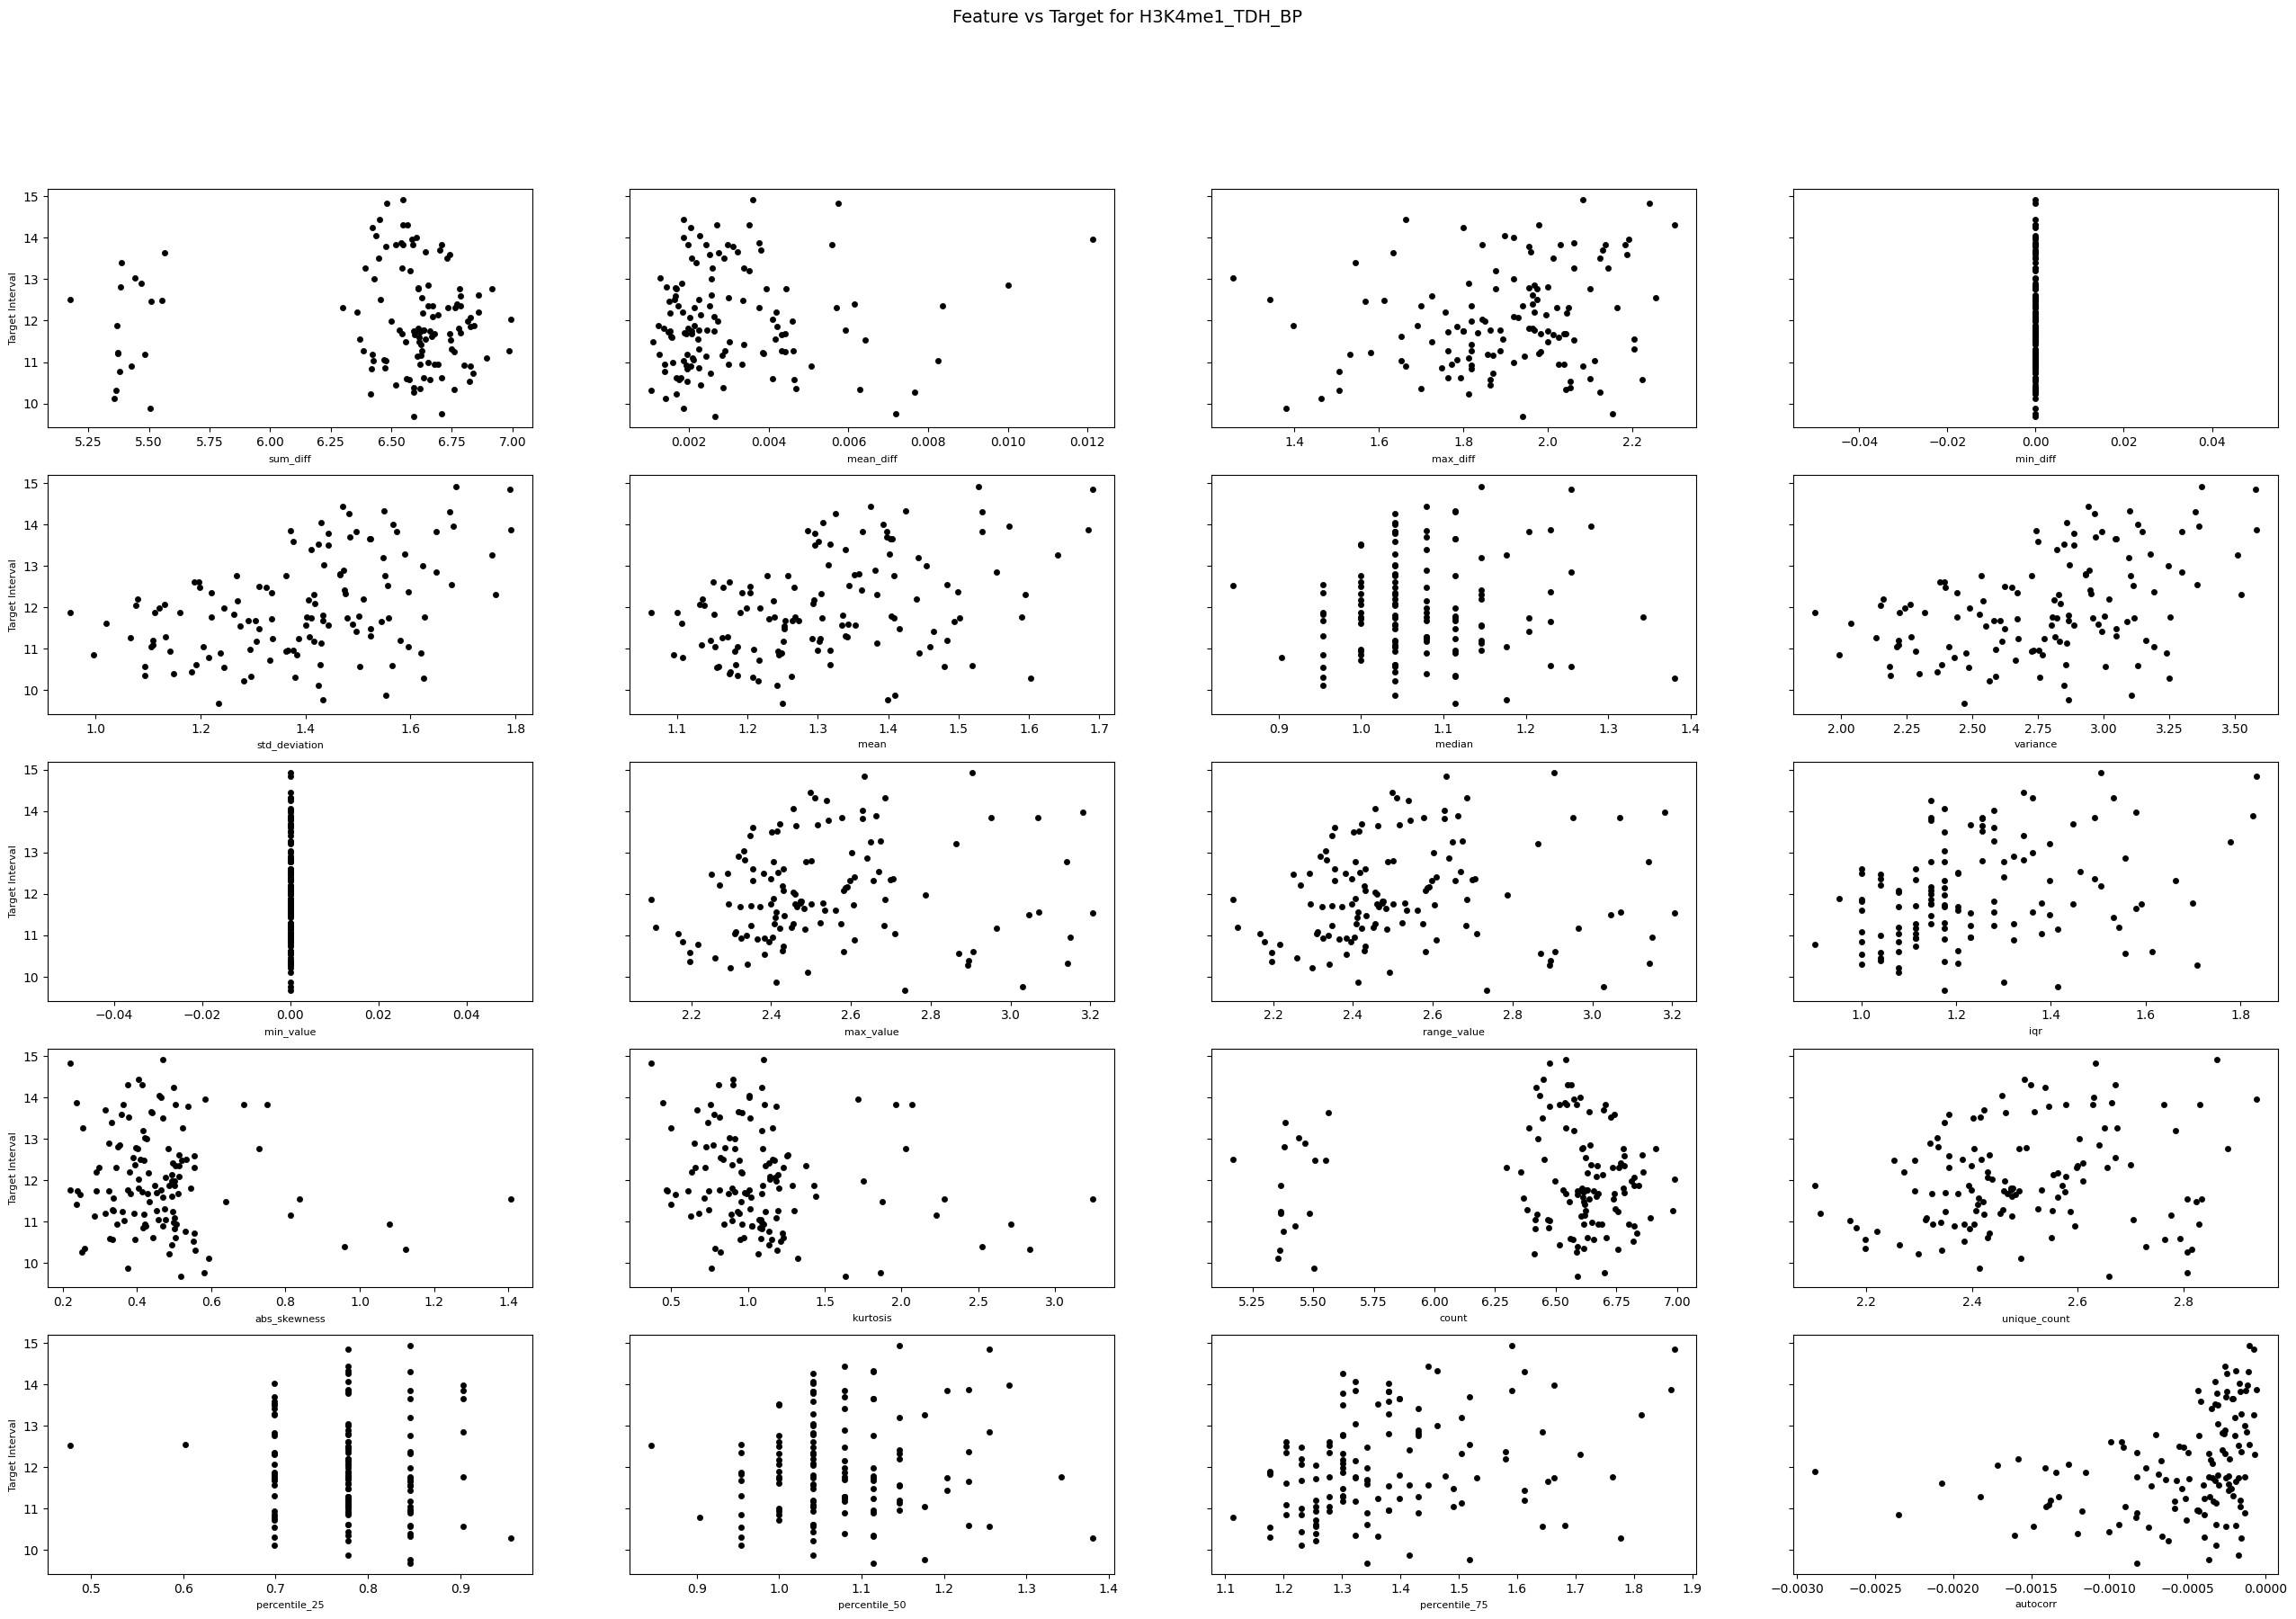

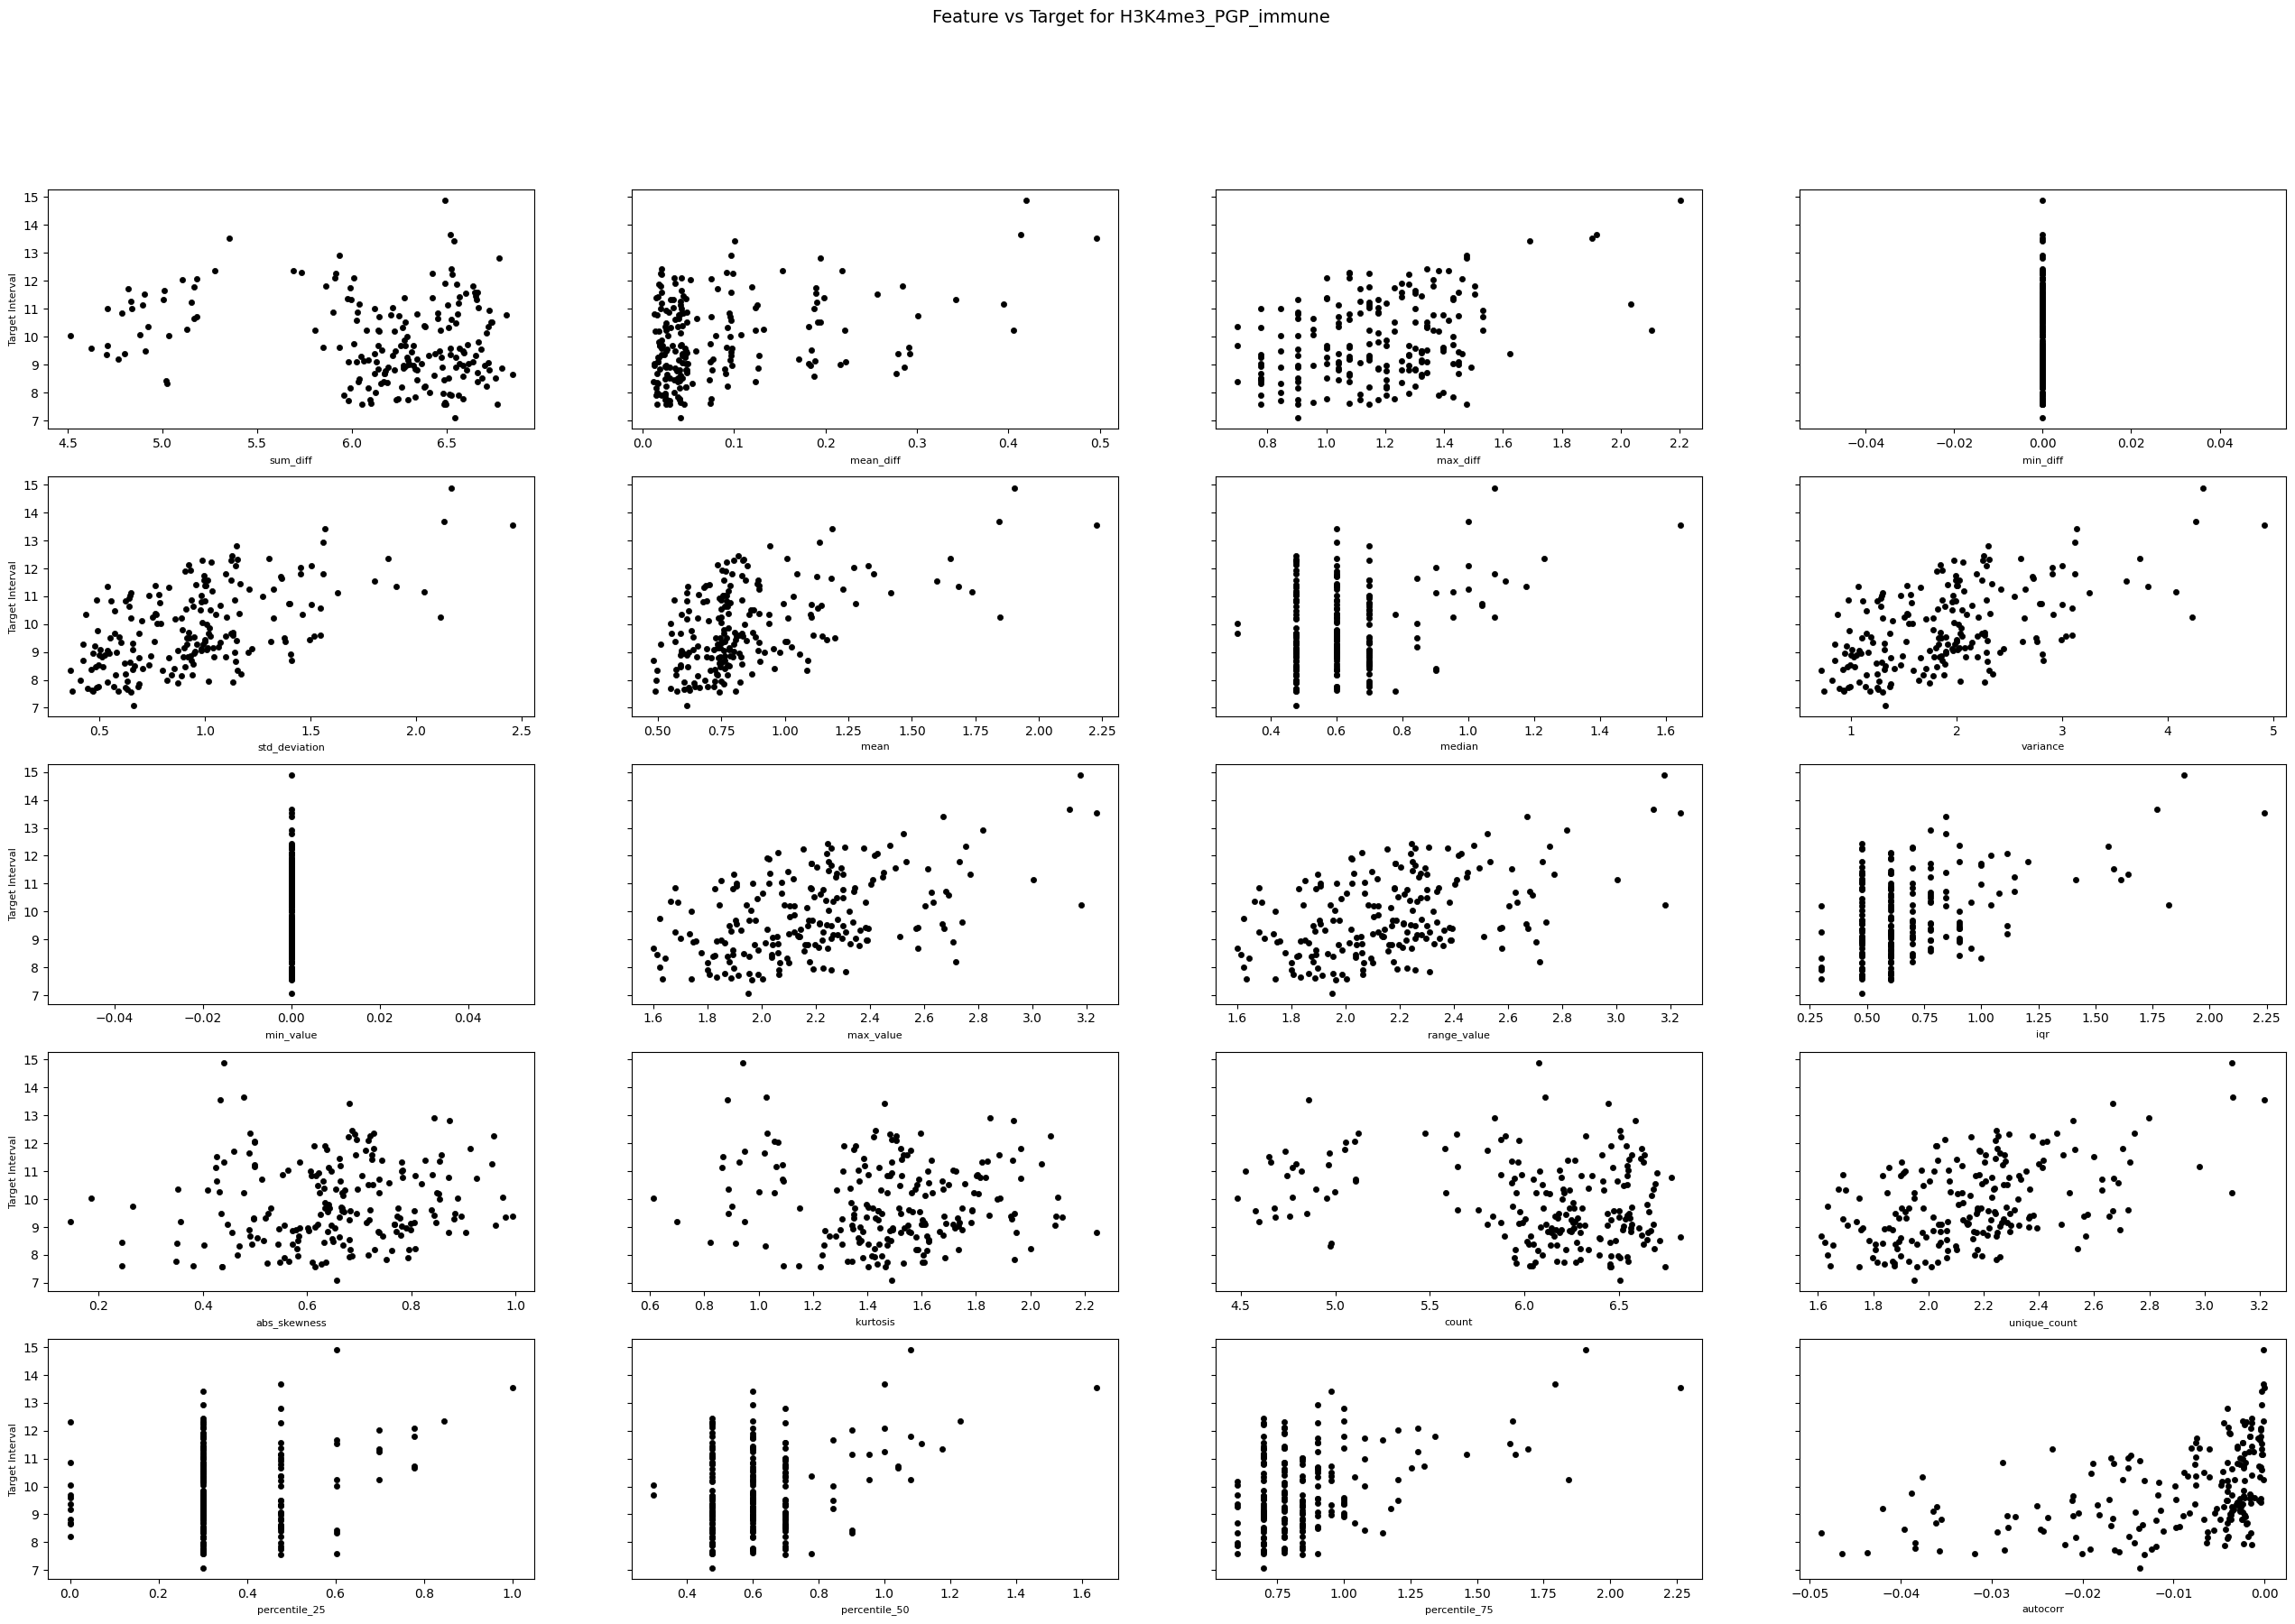

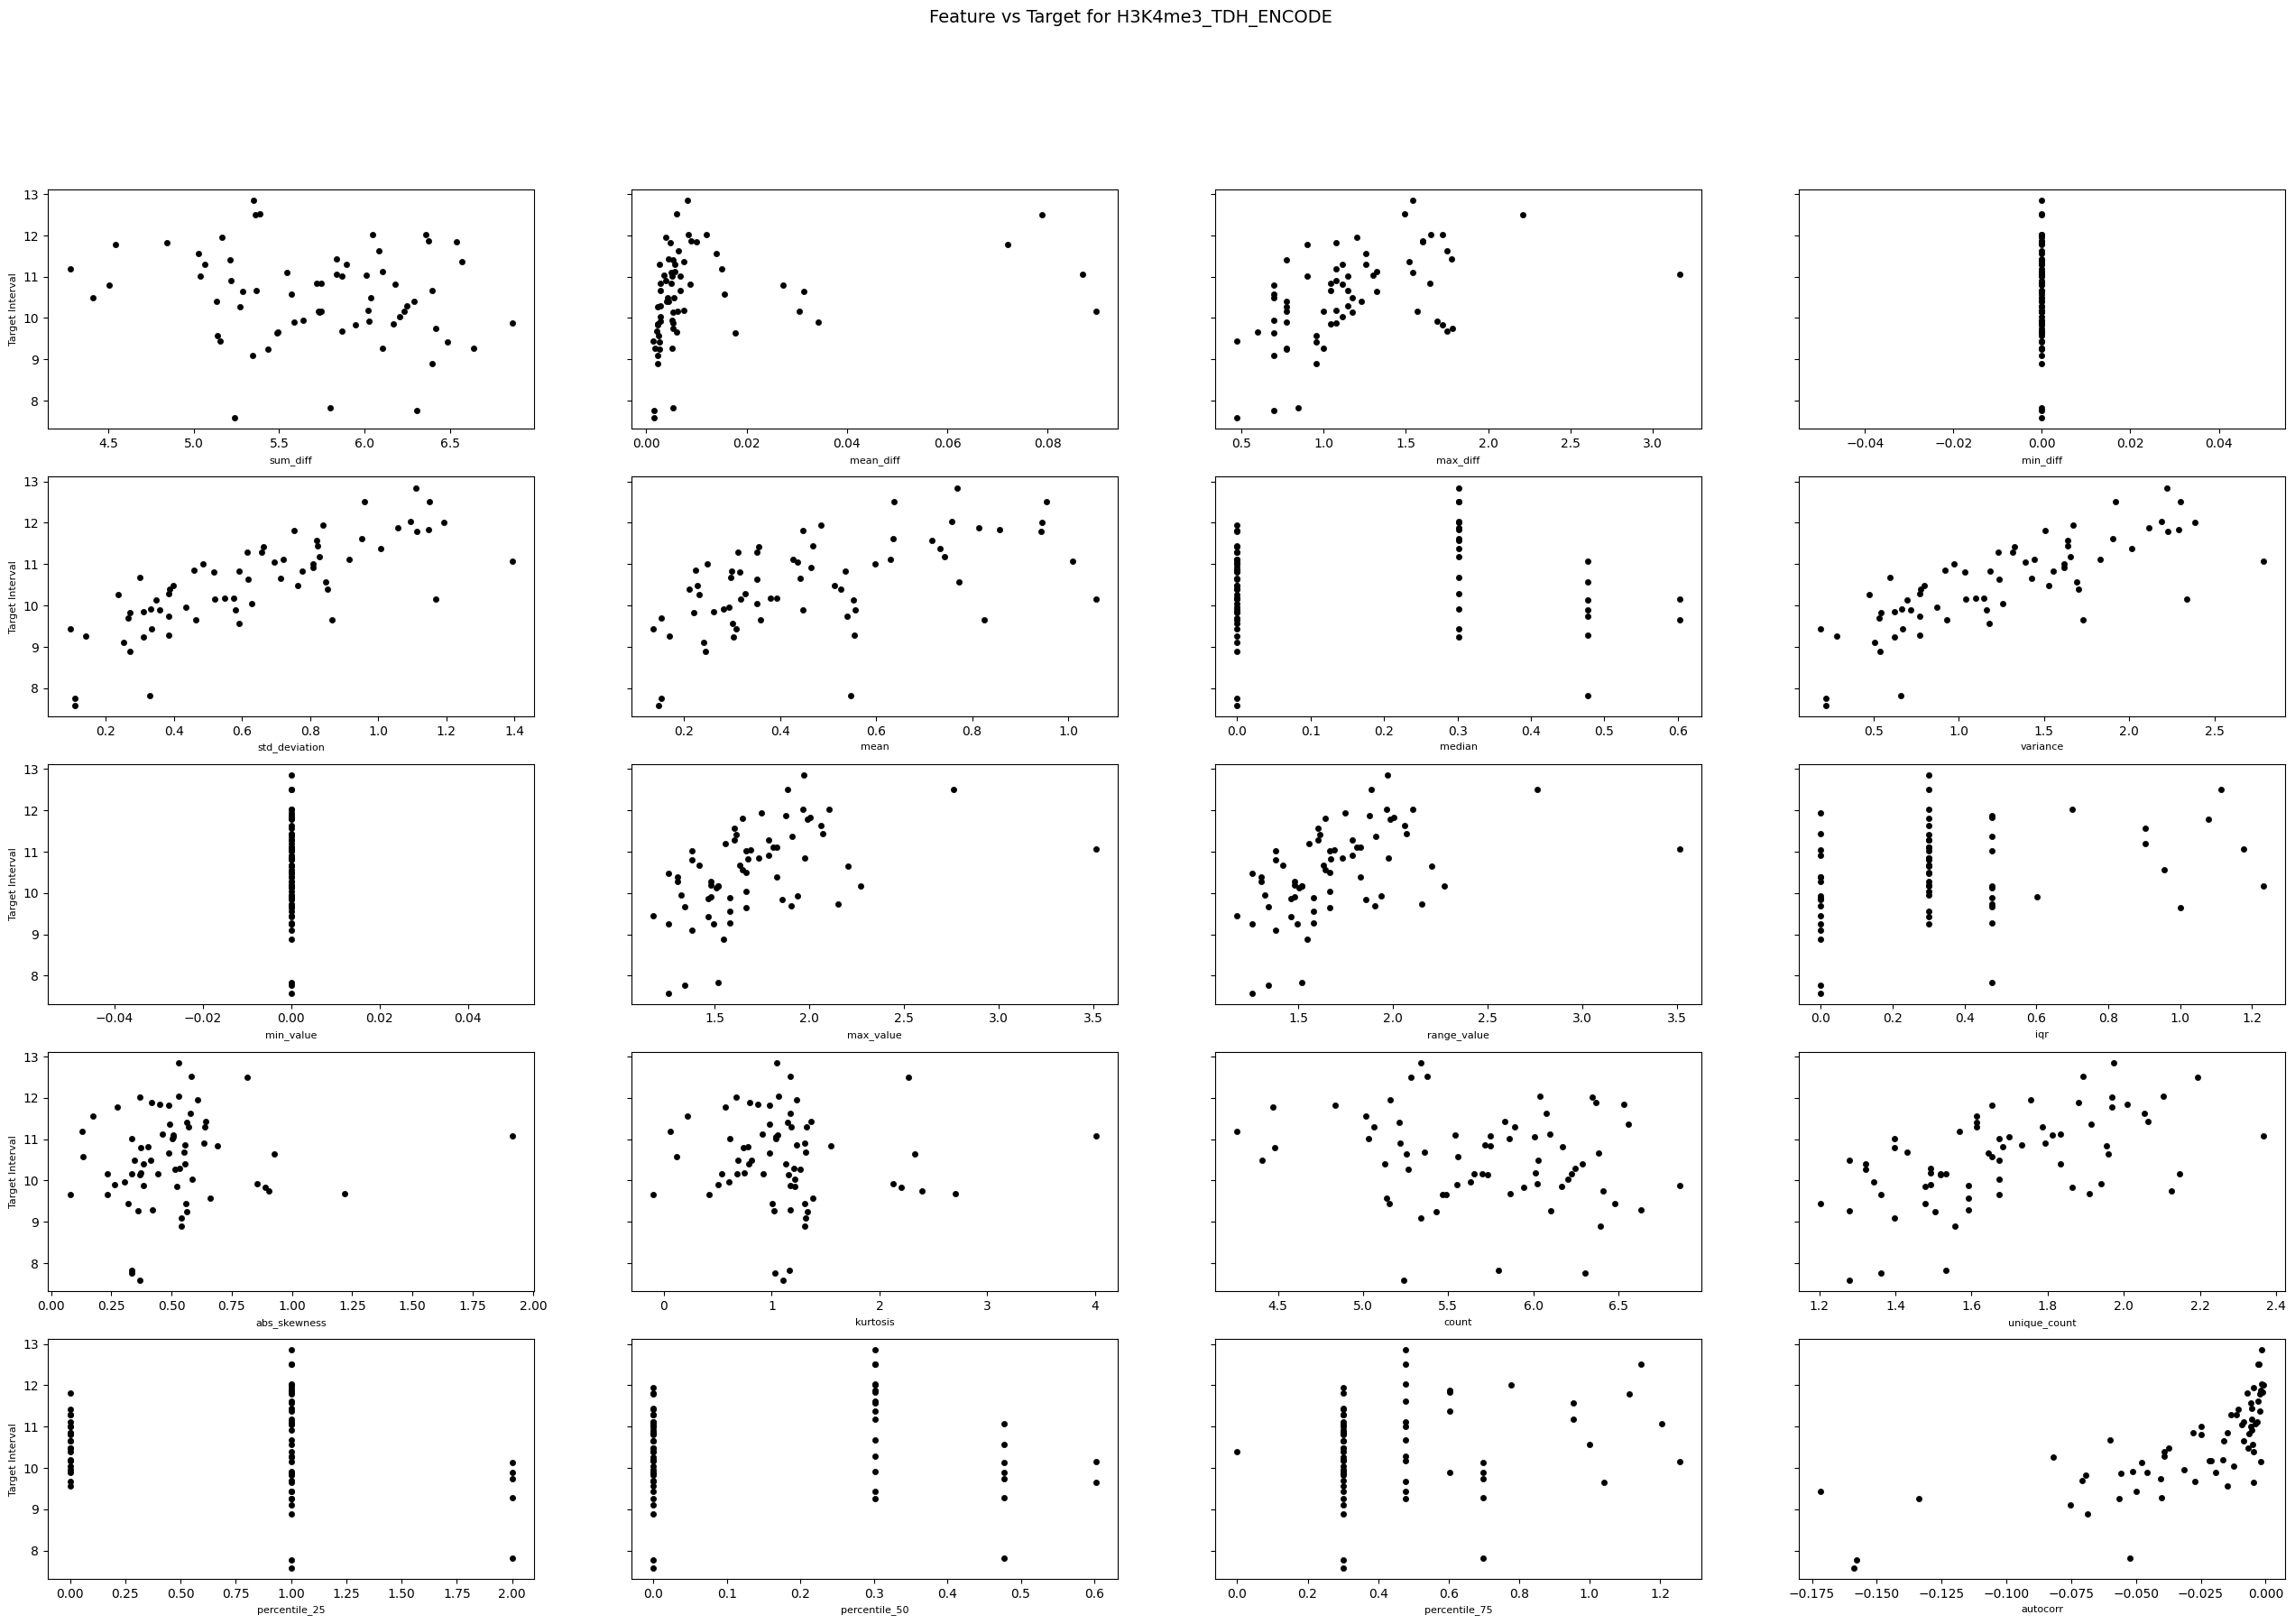

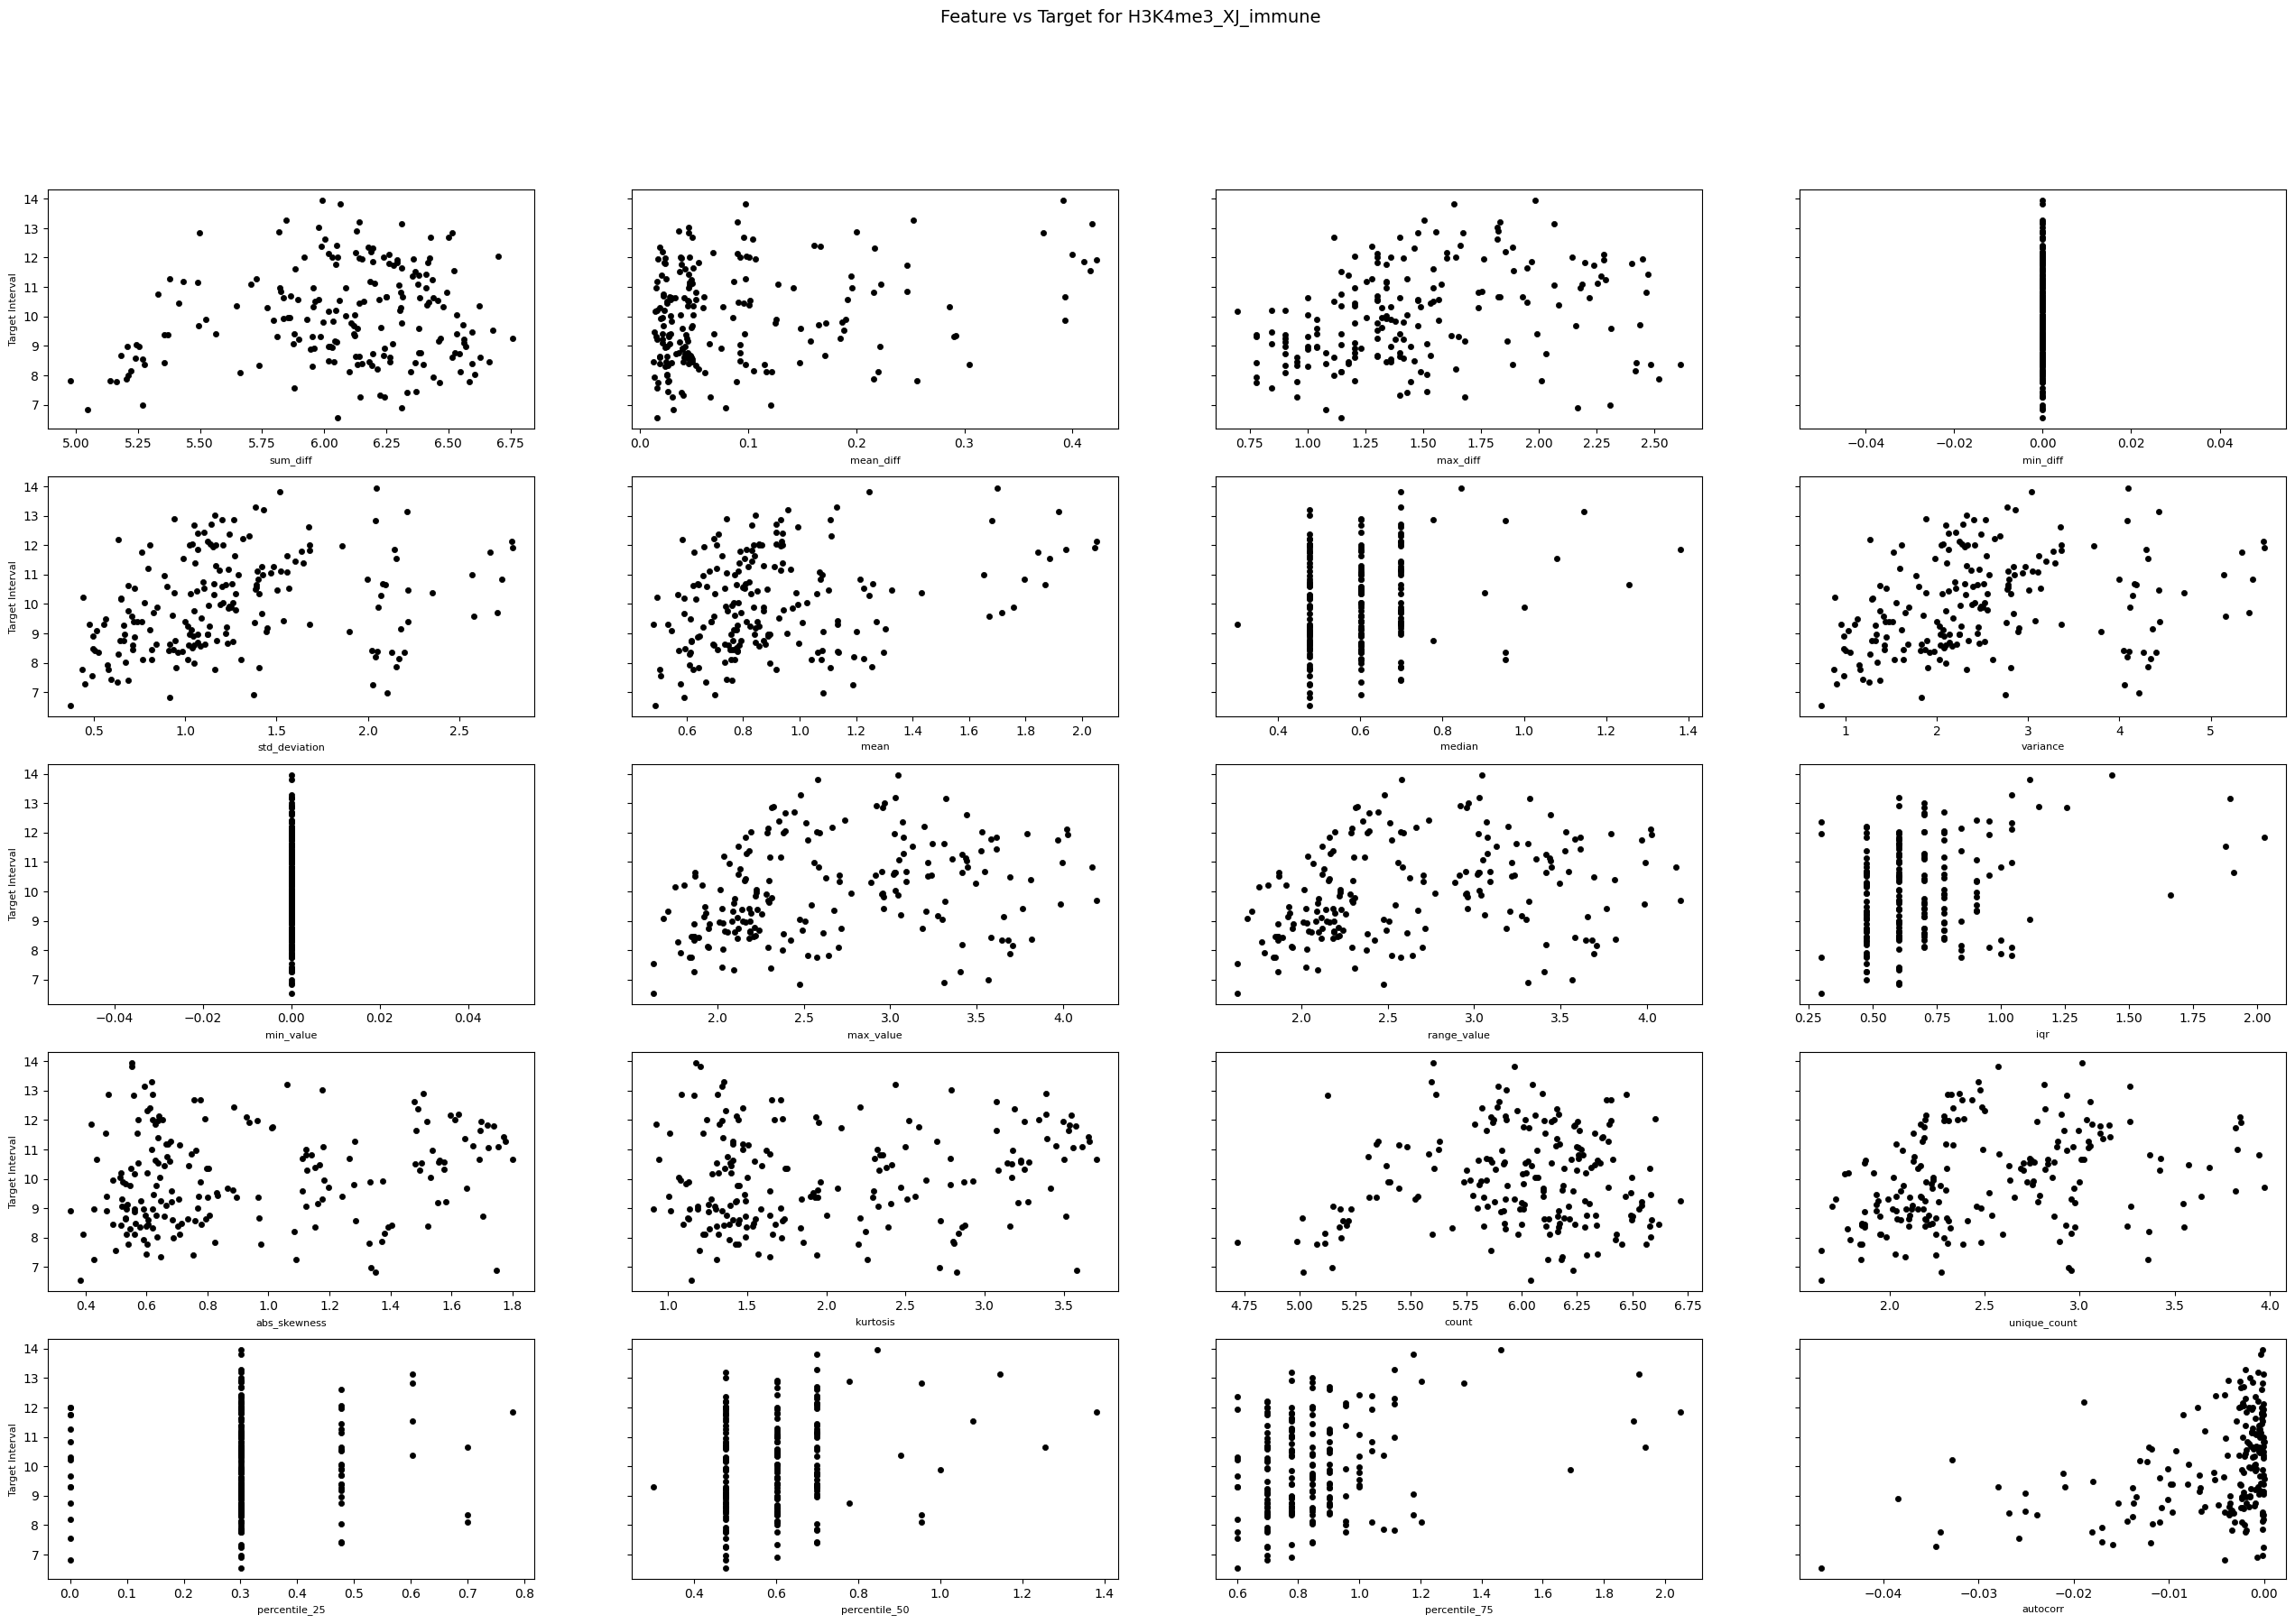

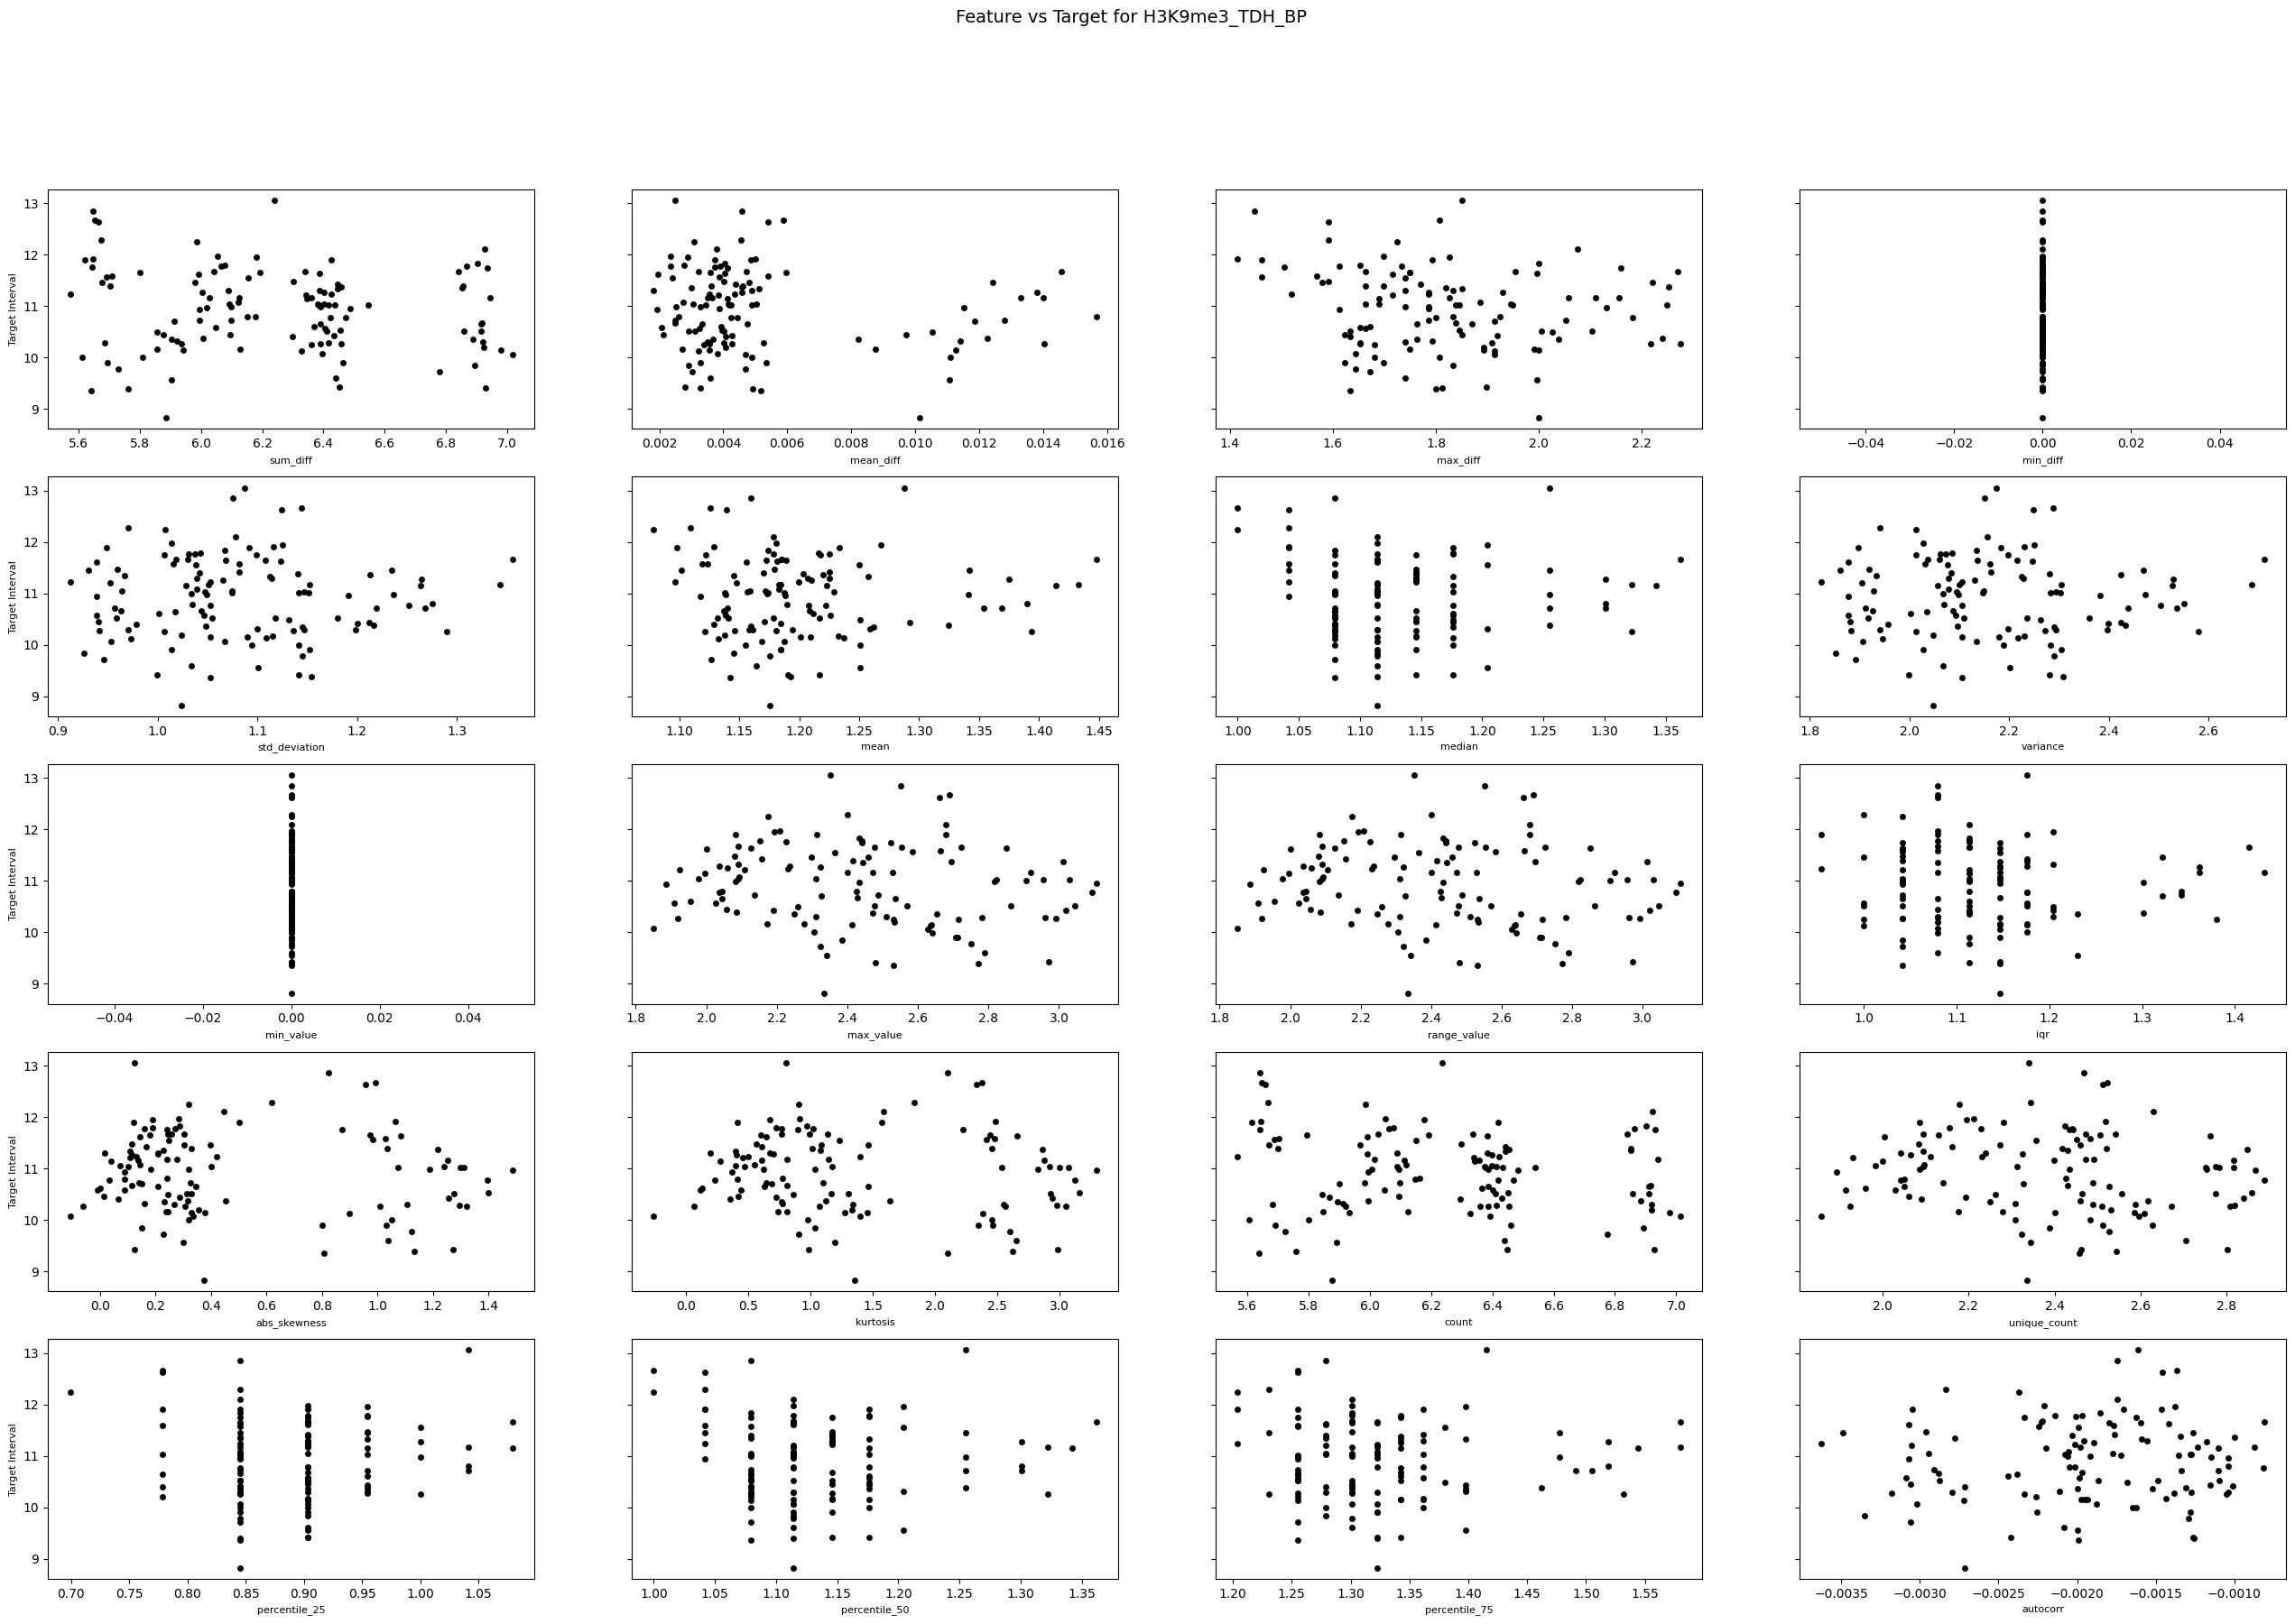

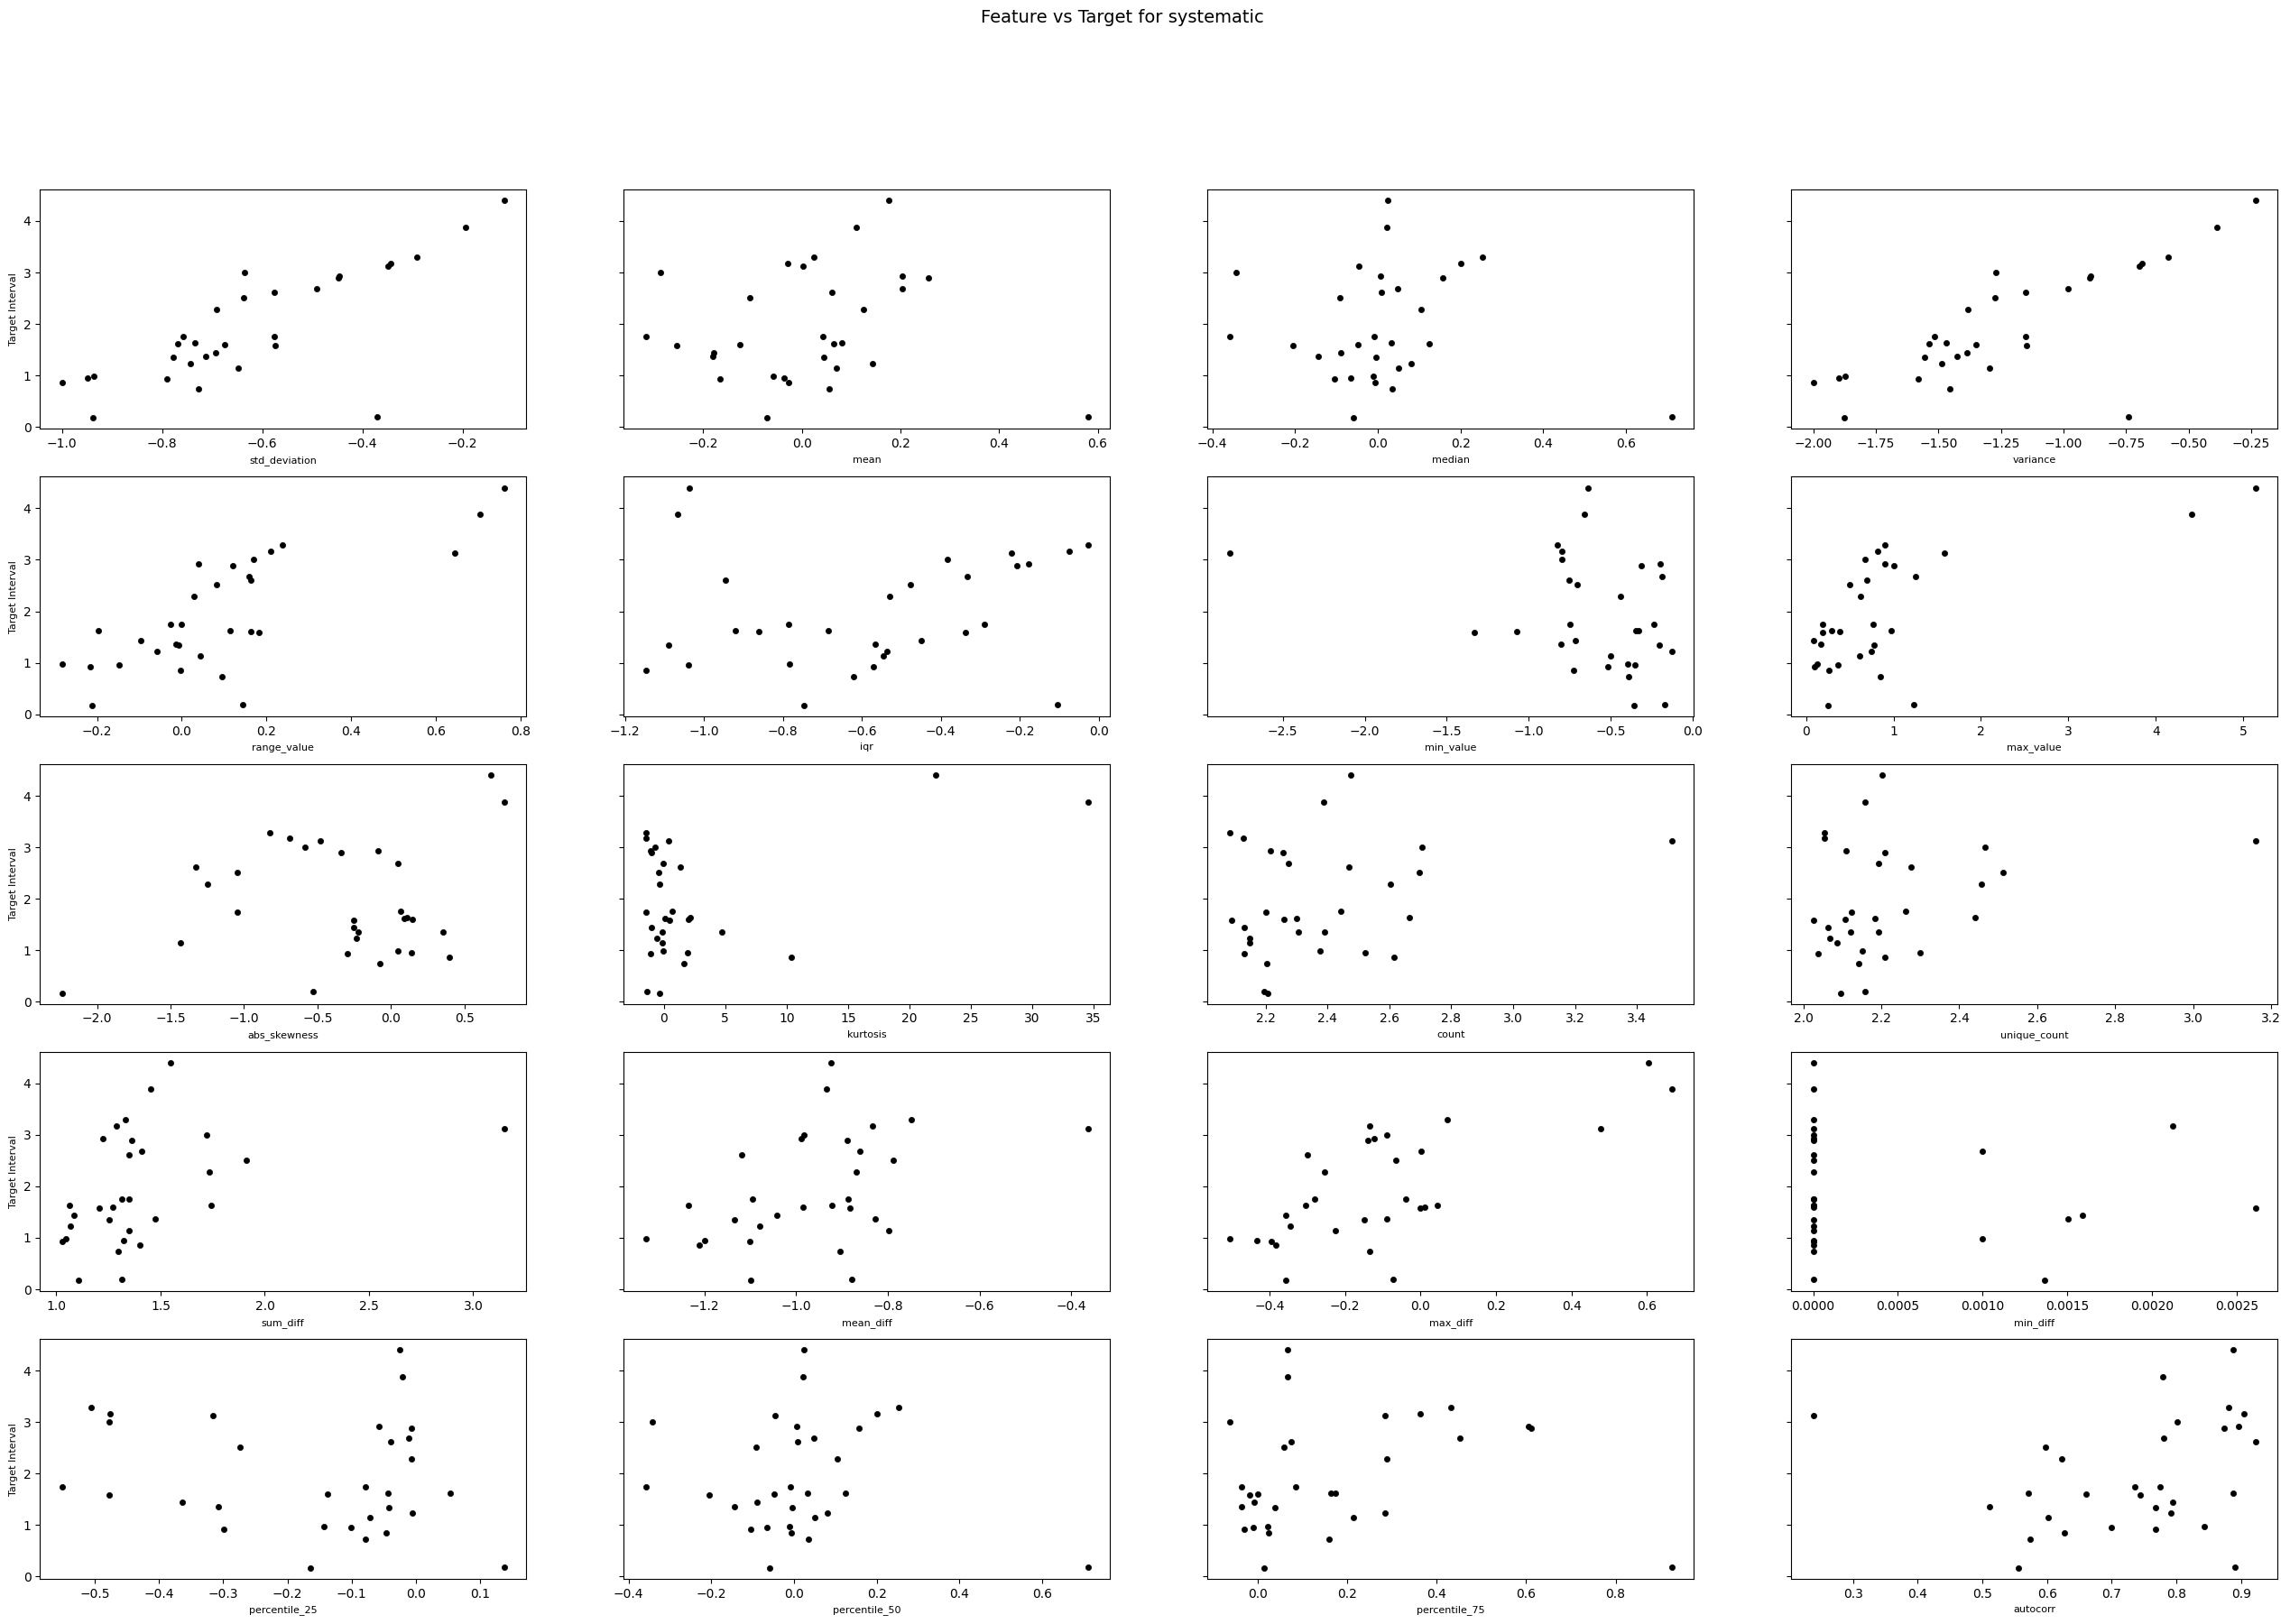

In [4]:
for dataset in datasets:
    plot_feature_target(dataset)